Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

# Raspoznavanje uzoraka
<a href="http://www.fer.unizg.hr/predmet/rasuzo_a">http://www.fer.unizg.hr/predmet/rasuzo_a</a>

Ak. god. 2015./2016.

#Detekcija i lokalizacija lica na temelju generalizirane Houghove transformacije

Autori:
<ul>
<li>Mislav Larva</li>
<li>Tomislav Marinković</li>
<li>Josip Milić</li>
<li>Petar Pavlović</li>
<li>Domagoj Pereglin</li>
<li>Domagoj Vukadin</li>
</ul>


*siječanj, 2016. , verzija 1.0*

#Teorijska podloga

Houghova transformacija se inicijalno razvila kao sredstvo za detekciju analitički poznato definiranih likova (linije, kružnice, elipse itd.). Generaliziranjem te transformacije nastala je Generalizirana Houghova transformacija (GHT) s kojom je moguće detektirati kompleksne oblike koji nemaju analitički poznatu formu.

Razlikujemo dva slučaja GHT-a:
1. Poseban slučaj - transformacija s fiksnom orijentacijom (kut = 0) i veličinom (skaliranje = 1)
2. Opći slučaj - transformacija s mijenjanjem kutova i veličina

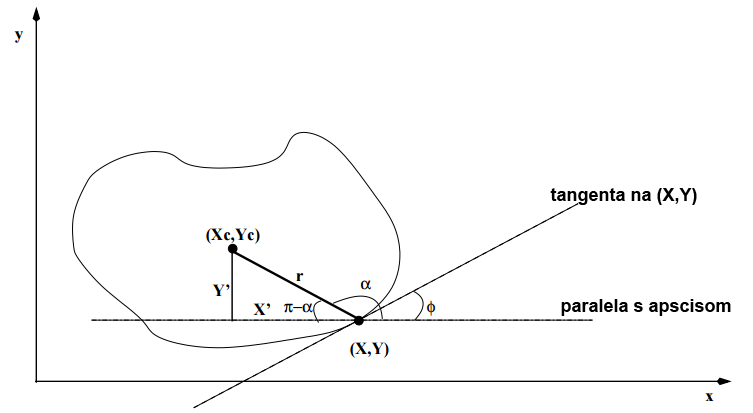

In [1]:
from IPython.display import Image
Image(filename='GHT_transformacija_01.png') #Prikazano kao kod jer se inače ne sprema u pretvorbi u HTML file

###Poseban slučaj

Ovakvu transformaciju još nazivamo i specijalnom jer se podrazumijeva da oblik kojeg želimo detektirati ima jednaku orijentaciju i veličinu kao i oblik koji nema služi kao referentni oblik. U praksi takav slučaj nije vjerojatan no može biti pokazatelj kako transformacija funkcionira. Također, manjim preinakama jednostavne GHT dobivamo složenu GHT.

$x = x_{c} + x'$
→
$x_{c} = x - x'$

$y = y_{c} + y'$
→
$y_{c} = y - y'$

$\cos(\pi - \alpha) = \frac{y'}{r}$
→ 
$y' = r\cos(\pi - \alpha) = -r\sin(\alpha)$

$\sin(\pi - \alpha) = \frac{x'}{r}$
→
$x' = r\sin(\pi - \alpha) = -r\cos(\alpha)$

Iz čega slijedi:

$$x_{c} = x + r\cos(\alpha)$$

$$y_{c} = y + r\sin(\alpha)$$

####Faza 1/2: Pretprocesiranje

1. Odabir referentne točke $(x_{c}, y_{c})$ (obično centar referentne slike).
2. Crtanje linije od referentne točke do točke ruba referentne slike.
3. Izračun kuta $\phi$ (prikazan na gornjoj slici).
4. Izrada R-tablice (obično rječnik) koja sadrži za svaki kut $\phi$ niz parova udaljenosti do ruba $r$ i kuta $\alpha$:

    $\phi_{1}: (r_{1}^1, \alpha_{1}^1), (r_{2}^1, \alpha_{2}^1), ...$
    
    $\phi_{2}: (r_{1}^2, \alpha_{1}^2), (r_{2}^2, \alpha_{2}^2), ...$  
      ...
    
    $\phi_{n}: (r_{1}^n, \alpha_{1}^n), (r_{2}^n, \alpha_{2}^n), ...$  
    
Pomoću R-tablice, koja je nastala obradom referentne slike, moguć je izračun pretpostavljene lokacije referentne točke na slici koju analiziramo odnosno u kojoj tražimo referentni oblik.

####Faza 2/2: Detekcija

<ol>
<li>
Detekcija se vrši nad slikom koja nije referentna. Stvori se matrica jednakih dimenzija kao ta slika. Svaka točka u toj matrici $P$ se u početku smatra kao pretpostavljena referentna točka detekcije odnosno matrica se gleda kao graf i vrijednost svake koordinate/elementa je u početku nula.
</li>
<li>
Kako bi proces detekcije bio jednostavniji, promatraju se samo točke slike koje su na jasnim rubovima (mjesta gdje je velika razlika između vrijednosti piksela) unutar slike. Za svaku takvu točku $(x,y)$:
</li>
<ul>
<li>2.1. Koristeći gradijentni kut $\phi$ od $(x,y)$, dohvatiti sve $(r,\alpha)$ parove za taj kut.</li>
<li>2.2. Za svaki $(r,\alpha)$ par potrebno je izračunati pretpostavljenu referentnu točku:
$$x_{c} = x + r\cos(\alpha)$$

$$y_{c} = y + r\sin(\alpha)$$</li>
<li>2.3. U koordinati $(x_{c},y_{c})$ u $P$ povećava se vrijednost za 1:</li>
$$P[x_{c}][y_{c}]++$$
</ul>
<li>Veća vrijednost točke $P[x_{c}][y_{c}]$ znači veća pretpostavka da upravo u toj točci se nalazi referentna točka traženog oblika odnosno u tom dijelu slike se nalazi traženi oblik. Obično se postavi neki prag $T$ i gledaju se samo točke koje imaju vrijednost $>T$, ostale točke su nepouzdane.</li> 
</ol>

###Opći slučaj

Pretpostavka da je traženi oblik podložan određenoj rotaciji $\theta$ i uniformnom skaliranju $s$:

$(x',y') --> (x'',y'')$

$x'' = s(x'\cos(\theta) - y'\sin(\theta))$

$y'' = s(x'\sin(\theta) + y'\cos(\theta))$

Zamjenom $x'$ s $x''$ i $y'$ s $y''$ dobivamo:

$$x_{c} = x - x'' → x_{c} = x - s(x'\cos(\theta) - y'\sin(\theta))$$

$$y_{c} = y - y'' → y_{c} = y - s(x'\sin(\theta) + y'\cos(\theta))$$

Postupak detekcije oblika koji to uzima u obzir je time robusniji i može se koristiti u praktične svrhe.

####Faza 1/2: Pretprocesiranje
Pretprocesiranje općeg slučaja je jednako pretprocesiranju posebnog slučaja.

####Faza 2/2: Detekcija
<ol>
<li>
U posebnom slučaju akumulacija se vršila nad pojedinom koordinatom odnosno povećavala se vrijednost pojedine koordinate matrice. U općem slučaju mora se uzeti obzir kut rotacije i skaliranje, i zato se dodaju dvije nove dimenzije za svaku koordinatu koja poprima oblik $(x_{c},y_{c},\theta,s)$. Svaka takva koordinata/element ima početnu vrijednost nula.
Ako se želi izbjeći proširivanje koordinate može se ostaviti $(x_{c},y_{c})$ oblik i stvoriti posebnu matricu za svaku kombinaciju kuta $\theta$ i skaliranja $s$. Npr. želimo koristiti kutove ${\theta_{1}, \theta_{2},...}$ i skaliranja ${s_{1}, s_{2}, ...}$, potrebno je napraviti posebno matricu za $(\theta_{1}, s_{1})$, $(\theta_{1}, s_{2})$, $(\theta_{1}, s_{3})$, ..., $(\theta_{m}, s_{n})$ i zatim vršiti akumulacije nad elementima svih tih ukupno $m*n$ matrica. Takav način je prikladan ako se žele pokazati vrijednosti za svaki $(\theta, s)$ slučaj.
</li>
<li>
Kako bi proces detekcije bio jednostavniji, promatraju se samo točke slike koje su na jasnim rubovima (mjesta gdje je velika razlika između vrijednosti piksela) unutar slike. Za svaku takvu točku $(x,y)$:
</li>
<ul>
<li>2.1. Koristeći gradijentni kut $\phi$ od $(x,y)$, dohvatiti sve $(r,\alpha)$ parove za taj kut.</li>
<li>2.2. Za svaki $(r,\alpha)$ par potrebno je izračunati pretpostavljenu referentnu točku:
$$x' = r\cos(\alpha)$$

$$y' = r\sin(\alpha)$$
<ul>
<li>$for(\theta = \theta_{1}; \theta <= \theta_{m}; \theta++)$</li>
    <ul>
    <li>$for(s = s_{1}; s <= s_{n}; s++)$</li>
    <ul>
        <li>$x_{c} = x - s(x'\cos(\theta) - y'\sin(\theta))$</li>   
        <li>$y_{c} = y - s(x'\sin(\theta) + y'\cos(\theta))$</li>     
        <li>$P[x_{c}][y_{c}][\theta][s]++$</li>
    </ul>
</ul>

</ul>
<li>Veća vrijednost točke $P[x_{c}][y_{c}][\theta][s]$ znači veća pretpostavka da upravo u toj točci se nalazi referentna točka traženog oblika odnosno u tom dijelu slike za određeni kut i određeno skaliranje se nalazi traženi oblik. Obično se postavi neki prag $T$ i gledaju se samo točke koje imaju vrijednost $>T$, ostale točke su nepouzdane.</li> 
</ol>

###Prednosti Generalizirane Houghove transformacije
- GHT se može koristiti za detekciju oblika.
- Robusna je za djelomično prikazane ili malo deformirane oblike.
- Robusna je za prisutnost drugih oblika (linije, krivulje itd.) koje nemaju veze s traženim oblikom.
- Tolerira prisutnost šuma.
- Može detektirati višestruko pojavljivanje traženog oblika u istoj slici.

###Nedostaci Generalizirane Houghove transformacije
- Zahtijeva zauzeće veće količine memorije.
- Procesorski intenzivna no postupak se može paralelizirati.

###Moguća poboljšanja
- Hijerarhijske reprezentacije: prvi pronalazak koristeći Houghovu rezolucijsku matricu i zatim selektivno proširivanje dijelova matrice koji imaju veće vrijednosti.
- Projekcije: umjesto višedimenzionalnih matrica koristiti nekoliko projekcija koje koriste koordinate (npr. $(x_{c},y_{c}), (y_{c},\theta),(\theta, s),(s, x_{c})$) i zatim pronaći konzistentne 'vrhove'.

#Implementacija

Postupak se implementirao pomoću programskog jezika Python (verzija 2.7.10).

##Biblioteke:


In [2]:
#Da plota slike/grafove u bilježnici, a ne da otvara novi prozor
%matplotlib inline

import os #Pristup datotekama
import math #Matematičke funkcije
from threading import Thread, current_thread #Višedretvenost
import time #Mjerenje vremena izvođenja
import numpy as np #Matrice
import matplotlib.pyplot as plt #Plotanje
from collections import defaultdict #Malo modificirani rječnik
from scipy.misc import imread, imresize #Čitanje i resizeanje slika
from skimage.feature import canny #Canny (rubovi) slike
from scipy.ndimage.filters import sobel #Gradijent

from mpl_toolkits.mplot3d import Axes3D #3D plotanje
from pylab import ogrid #Za 3D plotanje
from matplotlib._png import read_png #Za prikaz slike u 3D plotu
import matplotlib.cm as cm #Za colorbar pokraj plota s tockama
from mpl_toolkits.axes_grid1 import make_axes_locatable #Da colorbar bude jednake visine kao plot

import sys #Za izračun zauzeća memorije nekog objekta

import pickle as pkl #Za spremanje (i dohvaćanje) objekata kao datoteke


##Konstante:

In [3]:
DISTANCE = 10 #Vektori čija je euklidska udaljenost manja od ove vrijednosti smatraju se jednakima
MIN_CANNY_THRESHOLD = 90 #Pragovi za određivanje rubova (kontura) na slikama
MAX_CANNY_THRESHOLD = 110
RESIZE = 400 #Slike se smanjuju proporcionalno na način da najveća dimenzija nakon pretvorbe ima vrijednost RESIZE
ANGLES = [10*x for x in range(-2,3)] #Vektori se rotiraju za određeni kut iz ove liste kutova
SCALES = [round(0.2*x,2) for x in range(1,5)] #Vektori se skaliraju za određenu vrijednost iz ove liste skaliranja
THREADS_N = 4 #Broj dretvi koji se koristi prilikom akumulacije
BEST_PERC = 0.80 #Prikazuju se samo točke koje imaju vrijednost >= BEST_PERC*maksimalna ostvarena vrijednost

PROJECT_DIR = 'C:/Users/Josip/Documents/FAKS/RU/Projekt/' #Glavni direktorij projekta
IMG_DIR_REF = 'RU_Projekt_IMG_REF/' #Direktorij s referentnim slikama
IMG_DIR = PROJECT_DIR + 'RU_Projekt_IMG_IN/' #Direktorij sa slikama koje koristi projekt
IMG_SAVE_DIR = PROJECT_DIR + 'RU_Projekt_IMG_OUT/' #Direktorij gdje se spremaju slike

print '%d kutova: %s' % (len(ANGLES),str(ANGLES))
print '%d skaliranja: %s' % (len(SCALES),str(SCALES))

5 kutova: [-20, -10, 0, 10, 20]
4 skaliranja: [0.2, 0.4, 0.6, 0.8]


##Pomoćne dretve:

In [4]:
'''
Dretva koja uzima rubove slike, gradijent slike i originalnu referentnu točku (čiji se položaj traži prilikom detekcije).
Svaka dretva obrađuje jednu sliku i sprema ih u jedan globalni rječnik r_table.
Obrađuje sliku na način da za svaku točku ruba izračunava udaljenost r od referentne točke i kut angle s apscisom, i zatim sprema 
te vrijednosti u rječnik. Ključ je gradijent (sobel) od te točke, a vrijednost za taj ključ je lista (r, angle) parova.
Ako već postoji sličan par (r, angle) onda se novi par ignorira. Sličnost se računa tako što se prvo izračuna euklidska udaljenost 
između vektora koji su u polarnom obliku (tj. tih parova) i ako je ona manja od DISTANCE onda se smatra da su ti vektori jednaki.
'''
class FitRTableThread(Thread):
    def __init__(self, img_canny, img_sobel, origin, img_name):
        self.img_canny = img_canny
        self.img_sobel = img_sobel
        self.origin = origin
        self.img_name = img_name
        super(FitRTableThread, self).__init__()
        
    def get_euclidean_distance(self, (r1, angle1), (r2, angle2)):
        return math.sqrt(abs(r1**2 + r2**2 - 2*r1*r2*math.cos(angle1 - angle2)))
    
    def run(self):
        global r_table
        xc,yc = self.origin

        for (x,y),value in np.ndenumerate(self.img_canny):
            if value:
                dx = xc - x
                dy = yc - y
                r = math.sqrt( dx**2 + dy**2 )
                radians = math.atan2(dy, dx)
                angle = radians * (180 / math.pi)
                new_pair = (r, angle)

                pair_list = r_table[self.img_sobel[x,y]]
                too_similar = False
                for old_pair in pair_list:
                    distance = self.get_euclidean_distance(old_pair, new_pair)
                    if distance < DISTANCE:
                        too_similar = True
                        break

                if (not too_similar):
                    r_table[self.img_sobel[x,y]].append(new_pair)  
        print "Dretva",current_thread(), 'je fitala referentnu sliku "%s".' % self.img_name
    
'''
Dretva koja uzima dio rubova slike (lista koordinata) u kojoj želimo detektirati tražni oblik (lice).
Svaka dretva (ukupno njih THREADS_N) dobiva listu koordinata i za svaku od njih radi kalkulacije (GHT) koje mogu biti 
opsežne ovisno o broju skaliranja s i dodatnih kutova angle_add.
Vrijednosti se spremaju u globalni rječnik accumulator_dict i to na način da je ključ (koordinata, skaliranje, dodatni kut) 
gdje je 'koordinata' koordinata pretpostavljene referentne točke.
Kad sve dretve obrade svoj dio slike stvara se akumulacijska matrica. Koristi se rječnik umjesto direktnog 
punjenja akumulacijske matrice zbog uštede memorije jer bi se za svako skaliranje i dodatni kut trebalo raditi 
posebnu matricu u memoriji. Na temelju tog rječnika može se posebno plotati akumulatorska matrica ovisna o skaliranju 
i dodatnom kutu.
'''
class AccumulateThread(Thread):
    def __init__(self, accumulator_list_part, gradient, r_table):
        self.accumulator_list_part = accumulator_list_part
        self.gradient = gradient
        self.r_table = r_table
        super(AccumulateThread, self).__init__()    
        
    def run(self):
        global accumulator_dict, accumulator, ANGLES, SCALES
        for (x,y) in self.accumulator_list_part:
            for (r,angle) in self.r_table[self.gradient[x,y]]:
                xref = r*math.cos(angle)
                yref = r*math.sin(angle)
                for angle_add in ANGLES:
                    for s in SCALES:
                        xc = x - s*(xref*math.cos(angle_add) - yref*math.sin(angle_add))
                        yc = y - s*(xref*math.sin(angle_add) + yref*math.cos(angle_add))
                        if xc < accumulator.shape[0] and yc < accumulator.shape[1]:
                            if xc >= 0 and yc >= 0:
                                xc = math.floor(xc)
                                yc = math.floor(yc)
                                key = (xc, yc), s, angle_add
                                if (key not in accumulator_dict):
                                    accumulator_dict[key] = 1
                                else:
                                    accumulator_dict[key] += 1     
        print "Dretva",current_thread(), ' je obradila %d koordinata rubova.' % len(self.accumulator_list_part)
        
        
        
        
        


##Pomoćne funkcije:

###Pomoćne funkcije obrade:

In [170]:
'''
Razdvaja listu na ukupno n listi s ravnomjerno raspoređenim elementima.
'''
def partition(lst, n):
    division = len(lst) / float(n)
    return [ lst[int(round(division * i)): int(round(division * (i + 1)))] for i in xrange(n) ]

'''
Izračunava gradijent za svaku koordinatu slike.
'''
def gradient_orientation(image):
    dx = sobel(image, axis=0, mode='constant')
    dy = sobel(image, axis=1, mode='constant')
    gradient = np.arctan2(dy,dx) * 180 / np.pi
    
    return gradient

'''
Stvara akumulacijsku matricu (odnosno akumulacijski rječnik) i puni je vrijednostima koje 
dobiva pomoću dretva. Svakoj dretvi predaje posebnu listu koordinata rubova (ukupno njih THREADS_N) 
i za svaku koordinatu se posebno izračunava GHT i spremaju se vrijednosti u rječnik.
Osim akumulacijske matrice sa svim vrijednostima rječnika može se napraviti posebno akumulacijska matrica 
ovisna o skaliranju i dodatnom kutu pomoću dobivenog rječnika.
Vrijeme izvođenja ovisi o broju skaliranja, dodatnih kutova, veličine rječnika s (r, angle) parovima
i korištenoj opremi. Proces je paraleliziran, ali zbog pristupa memoriji (rječnik ne stane u cache procesora) 
svaka dretva mora pričekati svoj red kad pristupa rječniku. Bez obzira na to, proces je osjetno ubrzan 
naspram korištenja samo jedne jezgre.
'''
def accumulate(r_table, grayImage):
    global accumulator, accumulator_dict
    start_time = time.time()
    edges = canny(grayImage, low_threshold=MIN_CANNY_THRESHOLD, 
                  high_threshold=MAX_CANNY_THRESHOLD)
    gradient = gradient_orientation(edges)

    
    accumulator = np.zeros(grayImage.shape)  
    
    shape = grayImage.shape
    indices_array = np.rollaxis(np.indices(shape), 0, len(shape)+1)
    accumulator_list = indices_array[edges].tolist()
    
    threads = []
    accumulator_list_parts = partition(accumulator_list, THREADS_N)
    for accumulator_list_part in accumulator_list_parts:
        threads.append(AccumulateThread(accumulator_list_part, gradient, r_table))
        threads[-1].start()
    for at in threads:
        at.join()
   
    for key in accumulator_dict:
        position = key[0]
        accumulator[position] += accumulator_dict[key]

    print 'Vrijeme akumulacije: %s' % (time.time() - start_time)
    return accumulator

'''
Izračunava euklidsku udaljenost između dva vektora koji su u polarnom obliku.
Koristi se kako bi se utvrdila sličnost između vektora (parova) u R-tablici.
'''
def get_euclidean_distance((r1, angle1), (r2, angle2)):
    return math.sqrt(abs(r1**2 + r2**2 - 2*r1*r2*math.cos(angle1 - angle2)))

'''
Uzima akumulacijsku matricu i neki postotni prag.
Vraća najbolje vrijednosti, sve vrijednosti koje su > postotni prag * maksimalna vrijednost.
Pretpostavljeni postotni prag je BEST_PERC.
'''
def n_max(acc, threshold = BEST_PERC):
    maximum = np.amax(acc)
    indices = acc.ravel().argsort()
    indices = (np.unravel_index(i, acc.shape) for i in indices)
    return [(acc[i], i) for i in indices if acc[i] > int(threshold*maximum)]


'''
Uzima ime slike i zahtjev za pretvorbu slike u crno bijelu. 
Pretvorba se obično radi kako bi obrada slike bila jednostavnija, 
a boja se ostavlja obično prilikom plotanja slike.
Metoda uniformno skalira sliku na način da najveća dimenzija slike 
postane RESIZE. Ako je najveća dimenzija slike <RESIZE onda se slika ne skalira.
'''
def load_img(img_name, flatten = True):
    img = imread(img_name, flatten=flatten)
    try:
        width = img.shape[1]
    except:
        img = imread(IMG_DIR+img_name, flatten=True)
        width = img.shape[1]
    height = img.shape[0]
    max_dim = max(width, height)
    if (max_dim > RESIZE):
        img = imresize(img, int(round(float(RESIZE)/max_dim*100,1)) )
    return img

'''
Uzima sliku i vraća canny (rubove) i sobel (gradijente) slike.
Canny koristi pragove MIN_CANNY_THRESHOLD i MAX_CANNY_THRESHOLD.
Veći broj rubova znači i potreba za duljim vremenom obrade pa je potrebno 
naći optimalne pragove koji bi uklonili praktički nebitne dijelove, ali 
i ostavili bitne dijelove slike.
''' 
def get_canny_sobel(img):
    img_canny = canny(img, low_threshold=MIN_CANNY_THRESHOLD, high_threshold=MAX_CANNY_THRESHOLD)    
    img_sobel = gradient_orientation(img_canny)
    return img_canny, img_sobel


'''
Mapira boje za colorbar pokraj plota s točkama.
'''
def discrete_cmap(N, base_cmap=None):
    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

'''
Učitava referentne slike i vraća njihove matrice.
'''
def load_ref_imgs(ref_img_paths):
    ref_images = []
    for ref_image_path in ref_img_paths:
        img_ref = load_img(ref_image_path)
        ref_images.append(img_ref)   
    return ref_images    

'''
Dijeli sliku na dijelove dimenzija d X d gdje je d
jednak RESIZE / 4.
'''
def get_img_parts(img):
    sq = RESIZE / 4
    shape_y, shape_x = img.shape
    y = 0
    x = 0
    parts = []
    parts_first_points = []
    while (y < shape_y):
        x = 0
        while (x < shape_x):    
            parts_first_points.append((y, x))
            parts.append(((x,y),img[y:y+sq, x:x+sq]))
            x += sq
        y += sq
    return parts, parts_first_points

'''
Izvodi akumulaciju (GHT postupak) nad dijelom slike i vraća najbolju nađenu točku,
njenu koordinatu i vrijednost.
'''
def accumulate_part(edges_list, gradient, r_table):
    points_dict = {}
    for (x,y) in edges_list:
        for (r,angle) in r_table[gradient[x,y]]:
            xref = r*math.cos(angle)
            yref = r*math.sin(angle)
            for angle_add in ANGLES:
                for s in SCALES:
                    xc = x - s*(xref*math.cos(angle_add) - yref*math.sin(angle_add))
                    yc = y - s*(xref*math.sin(angle_add) + yref*math.cos(angle_add))
                    if xc < gradient.shape[0] and yc < gradient.shape[1]:
                        if xc >= 0 and yc >= 0:
                            xc = math.floor(xc)
                            yc = math.floor(yc)
                            key = (xc, yc)
                            points_dict[key] = points_dict.get(key, 0) + 1
    try:                        
        best_key = max(points_dict, key=points_dict.get)
        best_value = points_dict[best_key]
        best_keys = []
        for key in points_dict:
            if points_dict[key] == best_value:
                best_keys.append(key)
    except:
        best_keys = [(0,0)]
        best_value = 0
        
    return best_value, best_keys
 
'''
Vraća listu u kojoj je svaki element najbolja 
točka pojedinog dijela slike.
'''
def get_best_points_of_parts(img_parts):    
    best_points_of_parts = []
    current = 1
    for part in img_parts:
        start_time = time.time()
        (x,y),img_part = part
        edges_part = get_canny_sobel(img_part)[0]
        gradient_part = gradient_orientation(edges_part) 
        shape_part = img_part.shape
        indices_array = np.rollaxis(np.indices(shape_part), 0, len(shape_part)+1)
        edges_part_list = indices_array[edges_part].tolist()    
        best_points_of_parts.append(accumulate_part(edges_part_list, gradient_part, r_table))
        print 'Trenutni dio: %d/%d' % (current, len(img_parts))
        print 'Vrijeme akumulacije dijela slike: %s s' % (time.time() - start_time)
        current += 1
    return best_points_of_parts    
    
'''
Izručanava i vraća položaje točaka pojedinih
dijelova na originalnoj slici.
'''
def get_adjusted_part_points(best_points_of_parts, parts_first_points):
    adjusted_part_points = []
    current = 1
    for part in best_points_of_parts:
        first_y, first_x = parts_first_points[current - 1]
        value, points = best_points_of_parts[current - 1]
        best_y, best_x = points[0]
        best_y += first_y
        best_x += first_x
        adjusted_part_points.append((value, (best_y, best_x)))
        current += 1 
    return adjusted_part_points  

'''
Provjerava nalazi li se točka unutar mata lica.
'''
def test_inside_edges(img_matte, (x, y)):
    if (img_matte[x,y] < 255):
        return True
    else:
        return False

'''
Vraća liste točaka koje su izvan lica (false positive, fp), 
unutar lica (true positive, tp) i koje imaju premale 
vrijednosti (false negative, fn).
'''
def get_success_lists(adjusted_part_points, img_matte, T):
    tps = []
    fps = []
    fns = []
    for value, point in adjusted_part_points:
        if value < T:
            fns.append((value, point))
            continue
        if test_inside_edges(img_matte, point):
            tps.append((value, point))
        else:
            fps.append((value, point))  
    return fps, tps, fns

'''
Vraća optimalne pragove na temelju trenutnih točaka i mata
lica na slici.
'''
def get_thresholds(adjusted_part_points, img_matte):
    T_stop = max([x[0] for x in adjusted_part_points]) + 50
    Ts = range(T_stop)

    T_compromise = 0
    T_border = 0
    T_best = 0
    maximum_n_positives = 0
    best_value = 0
    min_fp = len(adjusted_part_points)
    for T in Ts:
        fps, tps, fns = get_success_lists(adjusted_part_points, img_matte, T)
        fp, tp, fn = len(fps), len(tps), len(fns)
        if (fp < min_fp):
            min_fp = fp
            T_best = T
        if (best_value == 0):
            best_value = tp
        else:
            if tp < best_value and T_border == 0:
                T_border = T - 1
        if T_compromise == 0:
            if tp < fn:
                T_compromise = T - 1
    return T_stop, T_compromise, T_border, T_best

'''
Vraća FP, TP i FN liste točaka gdje je svaki element ovisan o pragu T
koji ima vrijednost od 0 do T_stop.
'''
def get_success_values(adjusted_part_points,img_matte, T_stop):
    Ts = range(T_stop)
    success_values = []

    for T in Ts:
        fps, tps, fns = get_success_lists(adjusted_part_points, img_matte, T)
        success_values.append((len(fps), len(tps), len(fns)))
    return success_values
        
'''
Vraća broj FP, TP i FN točaka ovisan o pragu T.
'''
def get_success_ns(success_dict, T):
    fps_n = len([x for x in success_dict['fps'] if x[0] >= T])
    tps_n = len([x for x in success_dict['tps'] if x[0] >= T])
    fns_n = len(success_dict['fps']) + len(success_dict['tps']) - fps_n - tps_n
    return fps_n, tps_n, fns_n

'''
Izračunava optimalne pragove na temelju FP, TP i FN lista.
'''
def get_Ts_success(success_dict):
    T_stop = 0
    for ff in ('fps', 'tps'):
        maximum = sorted(success_dict_all[ff])[-1][0]
        if maximum > T_stop:
            T_stop = maximum
        
    Ts = range(T_stop)
    fps_n_max = float(get_success_ns(success_dict, 0)[0])
    fns_n_max = float(get_success_ns(success_dict, T_stop)[2])
    
    all_Ts = [get_success_ns(success_dict, T) for T in Ts]
    fps_Ts = [x[0]/fps_n_max for x in all_Ts]
    tps_Ts = [x[1]/fps_n_max for x in all_Ts]
    fns_Ts = [x[2]/fns_n_max for x in all_Ts]
    
    T_compromise = 0
    fps_min = fps_n_max
    T_best = 0
    T_border = 0
    for T_i in range(1,len(Ts)):
        if T_compromise == 0 and fns_Ts[T_i] > tps_Ts[T_i]:
            T_compromise = T_i
        if fps_Ts[T_i] < fps_min:
            fps_min = fps_Ts[T_i]
            T_best = T_i
        if T_border == 0 and tps_Ts[T_i] < tps_Ts[T_i-1]:
            T_border = T_i                       
    return T_stop, T_compromise, T_border, T_best

###Pomoćne funkcije prikaza:

In [172]:
'''
Uzima sliku i plota njezinu crno bijelu inačicu i canny (rubove) slike.
'''
def plot_img_canny_sobel(img, plot_origin = True, file_name = None, invert_canny = False):
    plt.gray()
    plt.subplot(121)
    if (file_name):
        plt.title(file_name)
    else:
        plt.title("Crno-bijela verzija slike")
    plt.imshow(img)
    if (plot_origin):
        plt.scatter(img.shape[1]/2, img.shape[0]/2,color = 'b', label = 'Originalna referentna tocka %s' % str((int(img.shape[1]/2), int(img.shape[0]/2) )))
        plt.legend()
    
    img_canny, img_sobel = get_canny_sobel(img)
    if (invert_canny):
        for i in range(len(img_canny)):
            for j in range(len(img_canny[i])):
                if (img_canny[i,j]):
                    img_canny[i,j] = False
                else:
                    img_canny[i,j] = True
    
    plt.subplot(122)
    plt.title("Konture slike")
    plt.imshow(img_canny)

'''
Plota i sprema akumulacijsku matricu. Vrijednost se prikazuje kao 'jačina' piksela; 
manja vrijednost -> tamniji piksel, veća vrijednost -> svijetli piksel.
'''
def plot_accumulator(accumulator_mat, file_name, plot_title, show = False):
    fig = plt.figure(figsize=(12, 12))
    plt.title(plot_title) 
    print file_name
    im = plt.imshow(accumulator_mat)
    plt.savefig(file_name, bbox_inches='tight')  
    if (show):
        plt.show()
    else:
        plt.close(fig)

'''
Plota sliku u kojoj se traži lice i na njoj pretpostavljene referentne točke različitih vrijednosti.
Različite vrijednosti su prikazane različitim bojama, a pokraj slike se plota i legenda boja (colorbar) 
'''
def plot_points(accumulator_mat, file_name, plot_title, show = False, save_file = False):
    img_test_color = load_img(IMG_DIR + img_test_name, flatten = False)
    ax = plt.gca()
    im = ax.imshow(img_test_color)
        
    maximum = np.amax(accumulator_mat)
    T = int(maximum*BEST_PERC)
    points = n_max(accumulator_mat)
        

    x_points = [point[1][1] for point in points]
    y_points = [point[1][0] for point in points]
    maximums = [point[0] for point in points]

    plt.title(plot_title)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cmap = cm.cool
    N = len(list(set(maximums)))
    c = np.array(maximums)   

    ax.plot([x_points[-1],x_points[-1]],[0,accumulator_mat.shape[0]], 'g--', label = 'Najbolja tocka (V = %d)' % maximums[-1])
    ax.plot([0,accumulator_mat.shape[1]], [y_points[-1],y_points[-1]], 'g--')
        
    ax.set_xlim(0,accumulator_mat.shape[1])
    ax.set_ylim(accumulator_mat.shape[0],0)
    ax.legend()
        
    sc = ax.scatter(x_points, y_points, marker='o', c=c, alpha = 0.8, s=20, cmap=discrete_cmap(N, 'cubehelix'))
    ticks = list(set(maximums))
    if len(ticks) > 30:
        ticks = ticks[0::len(ticks) / 30]
        if maximum not in ticks:
            ticks.append(maximum)
    plt.colorbar(sc, cax = cax, ticks=ticks)
        
    if (save_file):
        print file_name                                                                           
        plt.savefig(file_name, bbox_inches='tight')  
    if (not show):
        plt.close(fig)

'''
Plota graf u obliku kompasa s prikazom vektora duljine skaliranja s i kuta angle.
'''
def compass(s, angle, maximum, arrowprops=None):
    fig, ax = plt.subplots(subplot_kw=dict(polar=True))
    fig.set_figheight(3.0)
    kw = dict(arrowstyle="->", color='k')
    if arrowprops:
        kw.update(arrowprops)
    ax.annotate("", xy=(angle, s), xytext=(0, 0),
                 arrowprops=kw)
    ax.set_ylim(0, maximum)
    return fig, ax

'''
Sprema plot slike.
'''
def save_figure(save_path, dpi = 100):
    plt.savefig(save_path, dpi=dpi, bbox_inches='tight')
    
'''
Prikazuje i(li) sprema graf s crno-bijelom slikom i njezinom canny (konture) verzijom.
'''
def plot_ref_imgs_canny(ref_images, ref_img_paths, save_img = False, save_dir = None):
    ref_plots_paths = []
    if save_img and (not os.path.exists(save_dir)):
        os.makedirs(save_dir)
    for ref_image, ref_image_path in zip(ref_images, ref_img_paths):
        ref_image_name = ref_image_path.split('/')[-1]
        img_ref_name = '.'.join(ref_image_name.split('.')[:-1])
        plt.figure(figsize=(10, 10))
        plot_img_canny_sobel(ref_image, file_name = 'Referentna slika: ' + ref_image_name, invert_canny = True)
        if (save_img):
            save_name = img_ref_name + '_canny.jpg'
            save_path = save_dir + save_name
            save_figure(save_path, dpi=80)
            ref_plots_paths.append(save_path)
    return ref_plots_paths

'''
Prikazuje i(li) sprema kompozitnu sliku sastavljenu od grafova referentnih 
slika i njihovih canny verzija.
'''
def plot_ref_imgs_composite(ref_plots_paths, save_img = False, save_dir = None):
    row_n = int(math.ceil(len(ref_plots_paths)/3))
    column_n = 3
    subplot_i = 1
    for ref_plots_path in ref_plots_paths:
        plt.subplot(row_n,column_n, subplot_i)
        subplot_i += 1
        plt.subplots_adjust(wspace = 0.0)
        plt.subplots_adjust(hspace = 0.0)
        plt.axis('off')
        plt.imshow(imread(ref_plots_path))

    if (save_img):
        save_name = 'all_ref_images_canny.jpg'
        save_path = save_dir + save_name
        save_figure(save_path, dpi=100)

'''
Prikazuje i(li) sprema granice dijelova slike.
'''
def plot_img_parts_borders(img):
    shape_y, shape_x = img.shape
    plt.ylim(img.shape[0], 0)
    plt.xlim(0, img.shape[1])
    plt.imshow(img)
    sq = RESIZE / 4

    y = 0
    x = 0
    while (y < shape_y):
        x = 0
        while (x < shape_x):    
            plt.plot([x, min(x+sq,shape_x)], [y,y], linestyle = '--', color = 'w')
            plt.plot([x,x],[y, min(y+sq,shape_y)], linestyle = '--', color = 'w')
            x += sq
        y += sq
    plt.title('Granice dijelova (%d X %d) slike' % (sq, sq))

'''
Prikazuje i(li) sprema kompozitnu sliku sastavljenu od grafova dijelova slike
u crno-bijeloj verziji.
'''
def plot_img_parts(img):
    parts = get_img_parts(img)[0]
    parts_len = len(parts)
    row_n = int(math.ceil(float(parts_len)/4))
    column_n = int(math.ceil(float(RESIZE) / (RESIZE/4)))
    current = 1
    for part in parts:
        (x,y),img_part = part
        plt.subplot(row_n,4,current)
        plt.title('%d. dio' % (current))
        plt.imshow(img_part)
        current += 1

'''
Prikazuje i(li) sprema kompozitnu sliku sastavljenu od grafova dijelova slike
u canny verziji.
'''
def plot_img_parts_canny(img):
    parts = get_img_parts(img)[0]
    parts_len = len(parts)
    row_n = int(math.ceil(float(parts_len)/4))
    column_n = int(math.ceil(float(RESIZE) / (RESIZE/4)))
    current = 1
    for part in parts:
        (x,y),img_part = part
        img_part_canny = get_canny_sobel(img_part)[0]
        plt.subplot(row_n,4,current)
        plt.title('%d. dio' % (current))
        plt.imshow(img_part_canny)
        current += 1

'''
Prikazuje i(li) sprema kompozitnu sliku sastavljenu od grafova dijelova slike
s njihovim najbolje pronađenim točkama s napisanim vrijednostima.
'''
def plot_best_points_of_parts(img_parts, best_points_of_parts):
    parts_len = len(img_parts)
    column_n = int(math.ceil(float(RESIZE) / (RESIZE/4)))
    row_n = int(math.ceil(float(parts_len)/column_n))
    current = 1
    for part in img_parts:
        (x,y),img_part = part
        value, points = best_points_of_parts[current - 1]
        best_y, best_x = points[0]
        plt.subplot(row_n,column_n,current)
        plt.title('%d. dio, V = %d' % (current, value))
        plt.ylim(img_part.shape[0], 0)
        plt.xlim(0, img_part.shape[1])
        plt.imshow(img_part)
        if (value != 0):
            plt.scatter([best_x], [best_y], color = 'g', marker='o', edgecolor='black')
            plt.plot([best_x,best_x],[0,img_part.shape[0]], 'g--')
            plt.plot([0,img_part.shape[1]], [best_y,best_y], 'g--')
        current += 1 

'''
Prikazuje i(li) sprema originalnu sliku s najboljim točkama dijelova.
'''
def plot_best_points(img, adjusted_part_points):
    plt.imshow(img)
    plt.ylim(img.shape[0], 0)
    plt.xlim(0, img.shape[1])
    for value, (best_y, best_x) in adjusted_part_points:
        plt.scatter([best_x], [best_y], color = 'g', marker='o', edgecolor='black')
    plt.title('Najbolje tocke dijelova slike u ukupnoj slici')

'''
Prikazuje i(li) sprema originalnu sliku u crno-bijeloj verziji i njezin mat lica.
'''
def plot_img_face_matte(img, img_matte):
    plt.subplot(121)
    plt.title('Crno bijela verzija slike')
    plt.imshow(img)
    plt.subplot(122)
    plt.title('Rucno napravljen mat lica')
    plt.imshow(img_matte)

'''
Prikazuje i(li) sprema graf (ne)uspješnosti ovisan o pragovima i utjecaj
optimalnih pragova na pronađene točke na slici.
'''
def plot_success_values(img, img_matte, adjusted_part_points, T_stop, T_compromise, T_border, T_best):
    Ts = range(T_stop)
    
    parts_len = float(len(adjusted_part_points))
    #parts_len = 1 # bez normalizacije
    success_values = get_success_values(adjusted_part_points, img_matte, T_stop)
    false_positives = [x[0]/parts_len for x in success_values]
    true_positives = [x[1]/parts_len for x in success_values]  
    false_negatives = [x[2]/parts_len for x in success_values]
    
    figure_i = 1
    plt.subplot(4,1,figure_i)
    #plt.subplots_adjust(hspace = .001)
    plt.subplots_adjust(wspace = .1)
    figure_i += 1
    plt.ylim(0, 1) # zbog normalizacije
    plt.plot(Ts, false_positives, color = 'red', label = 'FP', linewidth=4)
    plt.plot(Ts, true_positives, color = 'green', label = 'TP', linewidth=3)
    plt.plot(Ts, false_negatives, color = 'blue', label = 'FN', linewidth=2)
    plt.xlabel('Prag T')
    plt.ylabel('Postotak (ne)uspjeha')
    

    show_Ts = T_compromise, T_border, T_best
    T_labels = ['Kompromisni', 'Granicni', 'Najbolji']
    plt.xticks([T_compromise, T_border, T_best], T_labels, rotation='vertical')
    plt.grid(True)
    for T in show_Ts:
        plt.plot([T,T], [0,1], color = 'y')
    plt.plot([T,T], [0,1], color = 'y', label = 'T-ovi')
    plt.legend(bbox_to_anchor=(1.10, 1.00))
    
    plot_name = 'Tocke dijelova slike, '
    T_names = 'kompromisni T = %d', 'granicni T = %d', 'najbolji T = %d' 
    names = 'FP', 'TP', 'FN'
    colors = 'r', 'g', 'b'
    
    figure_i += 1
    for T_i in range(len(show_Ts)):
        T = show_Ts[T_i]
        plt.subplot(5,1,figure_i)
        plt.subplots_adjust(wspace = .1)
        figure_i += 1
        plt.imshow(img)
        fps, tps, fns = get_success_lists(adjusted_part_points, img_matte, T)
        current = 0
        for vs in (fps, tps, fns):
            vs_x = [point[1] for value, point in vs]
            vs_y = [point[0] for value, point in vs]
            plt.scatter(vs_x, vs_y, marker='o', edgecolor='black', s = 20, color = colors[current], \
                        label = names[current] + ' = %d' % len(vs) )    
            current += 1
        plt.title(plot_name + T_names[T_i] % T)
        plt.xlim(0,img.shape[1])
        plt.ylim(img.shape[0],0)
        plt.legend(bbox_to_anchor=(1.40, 1.00))

'''
Prikazuje i(li) sprema graf (ne)uspješnosti ovisan o pragovima.
'''
def plot_success_values_n(success_dict):
    T_stop = 0
    for ff in ('fps', 'tps'):
        maximum = sorted(success_dict_all[ff])[-1][0]
        if maximum > T_stop:
            T_stop = maximum
        
    Ts = range(T_stop)
    fps_n_max = float(get_success_ns(success_dict, 0)[0])
    fns_n_max = float(get_success_ns(success_dict, T_stop)[2])
    
    all_Ts = [get_success_ns(success_dict, T) for T in Ts]
    fps_Ts = [x[0]/fps_n_max for x in all_Ts]
    tps_Ts = [x[1]/fps_n_max for x in all_Ts]
    fns_Ts = [x[2]/fns_n_max for x in all_Ts]
    
    T_compromise = 0
    fps_min = fps_n_max
    T_best = 0
    T_border = 0
    for T_i in range(1,len(Ts)):
        if T_compromise == 0 and fns_Ts[T_i] > tps_Ts[T_i]:
            T_compromise = T_i
        if fps_Ts[T_i] < fps_min:
            fps_min = fps_Ts[T_i]
            T_best = T_i
        if T_border == 0 and tps_Ts[T_i] < tps_Ts[T_i-1]:
            T_border = T_i                   
    
    plt.plot(Ts, fps_Ts, color = 'red', label = 'FP', linewidth=4)
    plt.plot(Ts, tps_Ts, color = 'green', label = 'TP', linewidth=3)
    plt.plot(Ts, fns_Ts, color = 'blue', label = 'FN', linewidth=2)
    plt.ylim(0,1)
    plt.grid()
    
    plt.legend(bbox_to_anchor=(1.10, 1.00)) 
    


###Glavna funkcija obrade:

In [173]:
'''
Obrađuje postepeno sliku, prikazuje i(li) sprema rezultate međukoraka.
Rezultate sprema u direktorij istog imena kao ispitna slika u direktorij IMG_DIR.
'''
def process_img_test(img_test_name, save_img = True, show_img = True):
    img_test = load_img(IMG_DIR + img_test_name, flatten = True)
    save_img_name = '.'.join(img_test_name.split('.')[:-1])
    save_img_dir = IMG_SAVE_DIR + save_img_name + '/'
    if not os.path.exists(save_img_dir):
        os.makedirs(save_img_dir)

    step = 0
    
    if save_img or show_img:
        img_color = load_img(IMG_DIR + save_img_name + '.jpg', flatten = False)
        fig = plt.figure(figsize=(8, 8))
        plt.imshow(img_color)
        if save_img:
            plt.savefig(save_img_dir + save_img_name  + '_%s_color.jpg' % str(step).zfill(2), \
                        dpi=80, bbox_inches='tight')
        if show_img:
            plt.show()
        else:
            plt.close(fig)
    
    step = 1

    if save_img or show_img:
        fig = plt.figure(figsize=(15, 15))
        save_path = save_img_dir + save_img_name  + '_%s_canny.jpg' % str(step).zfill(2)
        plot_img_canny_sobel(img_test, plot_origin = False)
        if (save_img):
            plt.savefig(save_path, dpi=100, bbox_inches='tight')
        if show_img:
            plt.show()
        else:
            plt.close(fig)
    
    
    step = 2
    
    if save_img or show_img:
        fig = plt.figure(figsize=(10, 10))
        plot_img_parts_borders(img_test)
        if save_img:
            plt.savefig(save_img_dir + save_img_name  + '_%s_parts_borders.jpg' % str(step).zfill(2), dpi=100, bbox_inches='tight')  
        if show_img:
            plt.show()
        else:
            plt.close(fig) 
            
    step = 3

    if save_img or show_img:
        fig = plt.figure(figsize=(15, 15))
        plot_img_parts(img_test)
        if save_img:
            plt.savefig(save_img_dir + save_img_name  + '_%s_parts.jpg' % str(step).zfill(2), dpi=100, bbox_inches='tight')
        if show_img:
            plt.show()
        else:
            plt.close(fig) 
            
    step = 4

    if save_img or show_img:
        fig = plt.figure(figsize=(15, 15))
        plot_img_parts_canny(img_test)
        if save_img:
            plt.savefig(save_img_dir + save_img_name  + '_%s_parts_canny.jpg' % str(step).zfill(2), dpi=100, bbox_inches='tight')
        if show_img:
            plt.show()
        else:
            plt.close(fig) 
            
    step = 5

    start_time = time.time()
    img_parts, parts_first_points = get_img_parts(img_test)

    pkl_parts_first_points = save_img_name + '_parts_first_points.pkl' #početne točke dijelova slike

    if pkl_parts_first_points not in os.listdir(save_img_dir):
        f = open( save_img_dir + pkl_parts_first_points, "wb" )
        pkl.dump(parts_first_points, f)
        f.close()

    pkl_best_points_of_parts = save_img_name + '_best_points_of_parts.pkl' #ako već postoje akumulirane točke 
                                                                           #ne treba se čekati akumulacija
    if pkl_best_points_of_parts in os.listdir(save_img_dir):
        best_points_of_parts = pkl.load( open( save_img_dir + pkl_best_points_of_parts, "rb" ))
    else:
        print 'Potrebna je akumulacija dijelova slike!'
        start_time = time.time()
        best_points_of_parts = get_best_points_of_parts(img_parts)
        print 'Vrijeme akumulacije dijelova slike: %s s' % (time.time() - start_time)
        f = open( save_img_dir + pkl_best_points_of_parts, "wb" )
        pkl.dump(best_points_of_parts, f)
        f.close()
    if save_img or show_img:
        fig = plt.figure(figsize=(15, 15))
        plot_best_points_of_parts(img_parts, best_points_of_parts)
        if save_img:
            plt.savefig(save_img_dir + save_img_name  + '_%s_parts_best_points.jpg' % str(step).zfill(2), dpi=100, bbox_inches='tight')
        if show_img:
            plt.show()
        else:
            plt.close(fig) 
            
    
    step = 6

    pkl_adjusted_part_points = save_img_name + '_adjusted_part_points.pkl' #ako već postoje popravljene točke
    if pkl_adjusted_part_points in os.listdir(save_img_dir):
        adjusted_part_points = pkl.load( open( save_img_dir + pkl_adjusted_part_points, "rb" ))
    else:
        adjusted_part_points = get_adjusted_part_points(best_points_of_parts, parts_first_points)
        f = open( save_img_dir + pkl_adjusted_part_points, "wb" )
        pkl.dump(adjusted_part_points, f)
        f.close()

    if save_img or show_img:
        fig = plt.figure(figsize=(10, 10))
        plot_best_points(img_test, adjusted_part_points)
        if save_img:
            plt.savefig(save_img_dir + save_img_name  + '_%s_best_points.jpg' % str(step).zfill(2), dpi=100, bbox_inches='tight')
        if show_img:
            plt.show()
        else:
            plt.close(fig)  
            
    step = 7

    img_matte_name = save_img_name + '_matte.jpg'
    img_matte = load_img(IMG_DIR + img_matte_name)
    if save_img or show_img:
        fig = plt.figure(figsize=(15, 15))
        plot_img_face_matte(img_test, img_matte)
        if save_img:
            plt.savefig(save_img_dir + save_img_name  + '_%s_face_position.jpg' % str(step).zfill(2), dpi=100, bbox_inches='tight')
        if show_img:
            plt.show()
        else:
            plt.close(fig) 
            
    step = 8

    T_stop, T_compromise, T_border, T_best = get_thresholds(adjusted_part_points, img_matte)
    fps, tps, fns = get_success_lists(adjusted_part_points, img_matte, 0)
    success_dict = {}
    success_dict['fps'] = fps
    success_dict['tps'] = tps

    pkl_success_dict = save_img_name + '_success_dict.pkl' #ako već postoje popravljene točke
    f = open( save_img_dir + pkl_success_dict, "wb" )
    pkl.dump(success_dict, f)
    f.close()

    if save_img or show_img:
        fig = plt.figure(figsize=(15, 20))
        plot_success_values(img_test, img_matte, adjusted_part_points, T_stop, T_compromise, T_border, T_best)
        plt.savefig(save_img_dir + save_img_name  + '_%s_success_values.jpg' % str(step).zfill(2), dpi=100, bbox_inches='tight')
        if show_img:
            plt.show()
        else:
            plt.close(fig) 

##Prikaz referentnih slika i njihovih rubova:

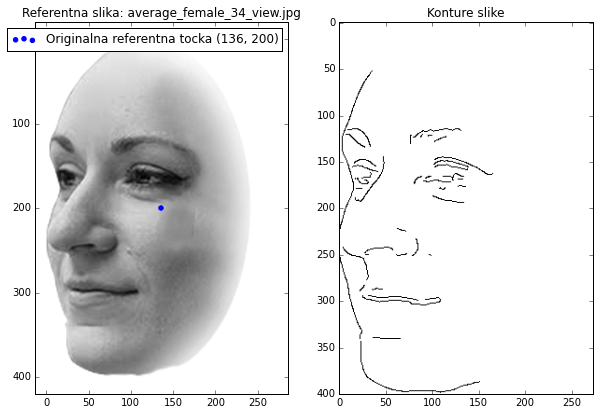

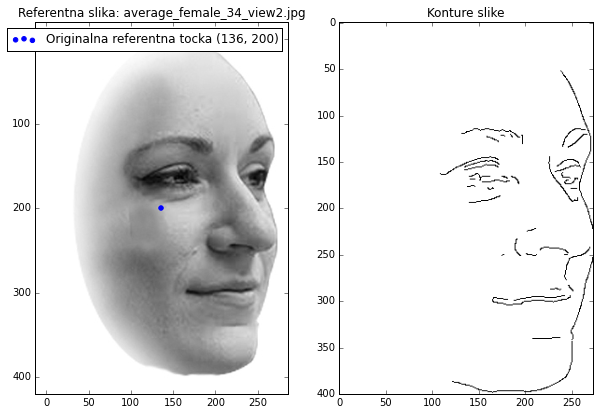

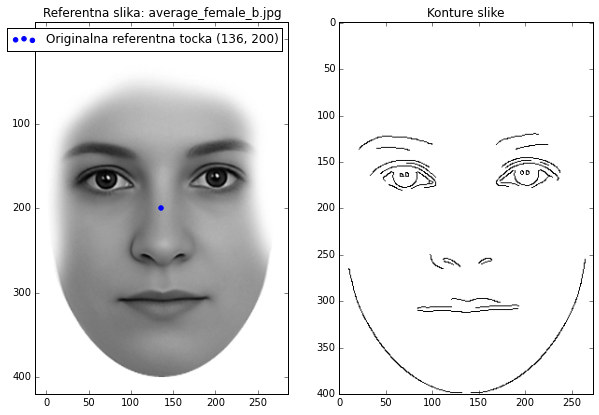

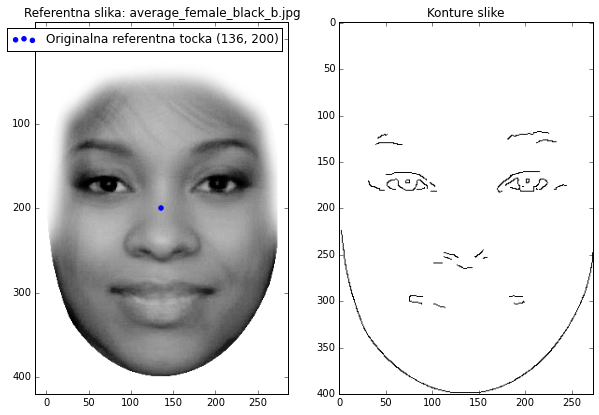

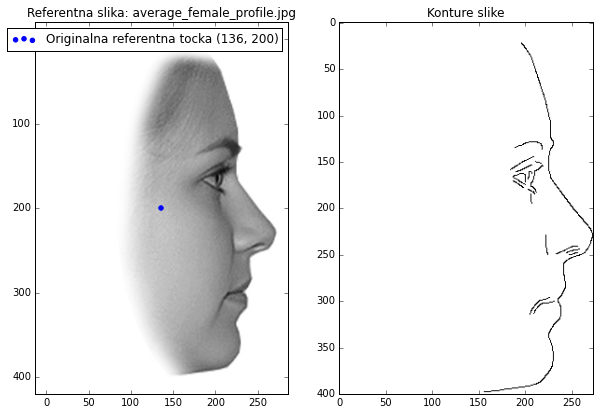

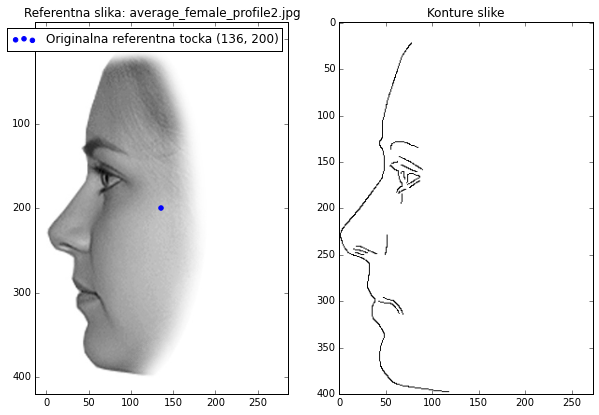

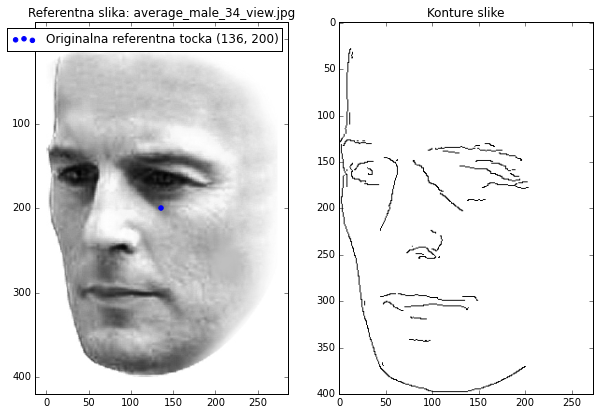

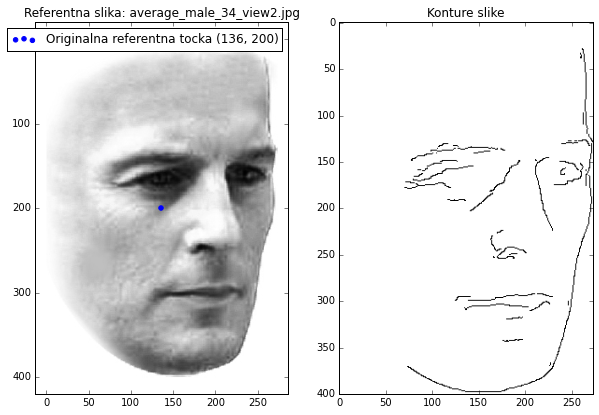

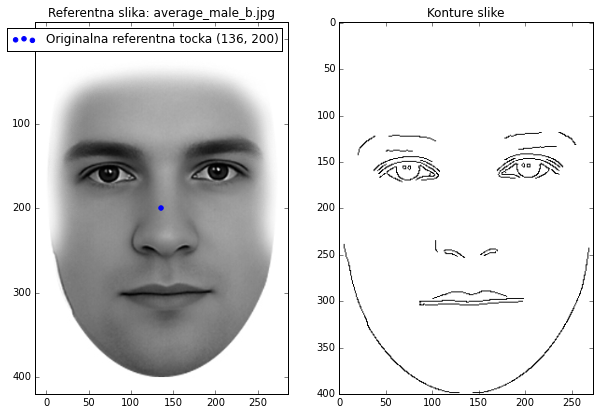

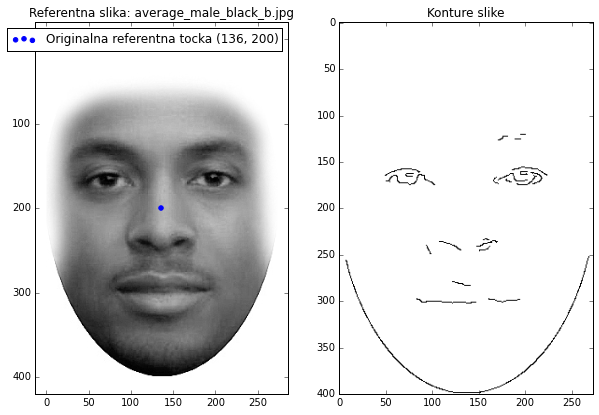

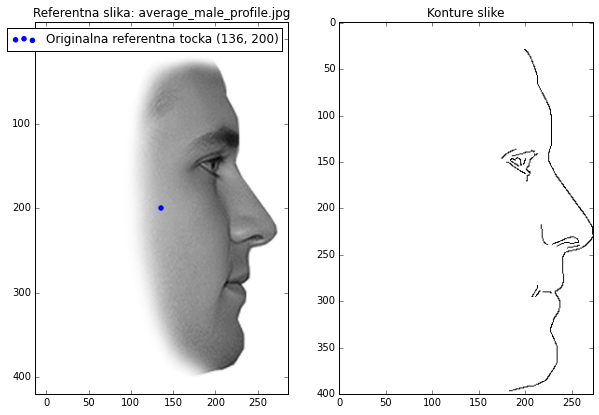

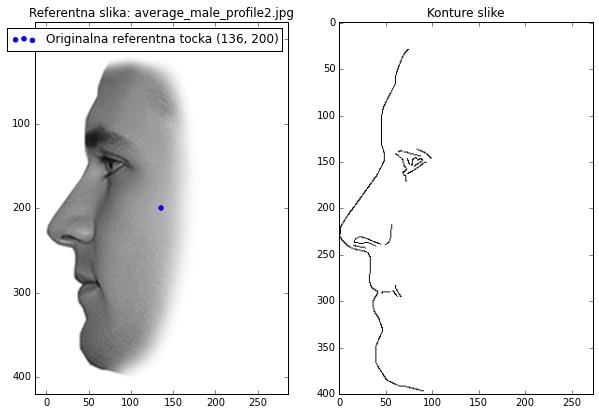

Kompozit svih referentnih slika i njihovih kontura:


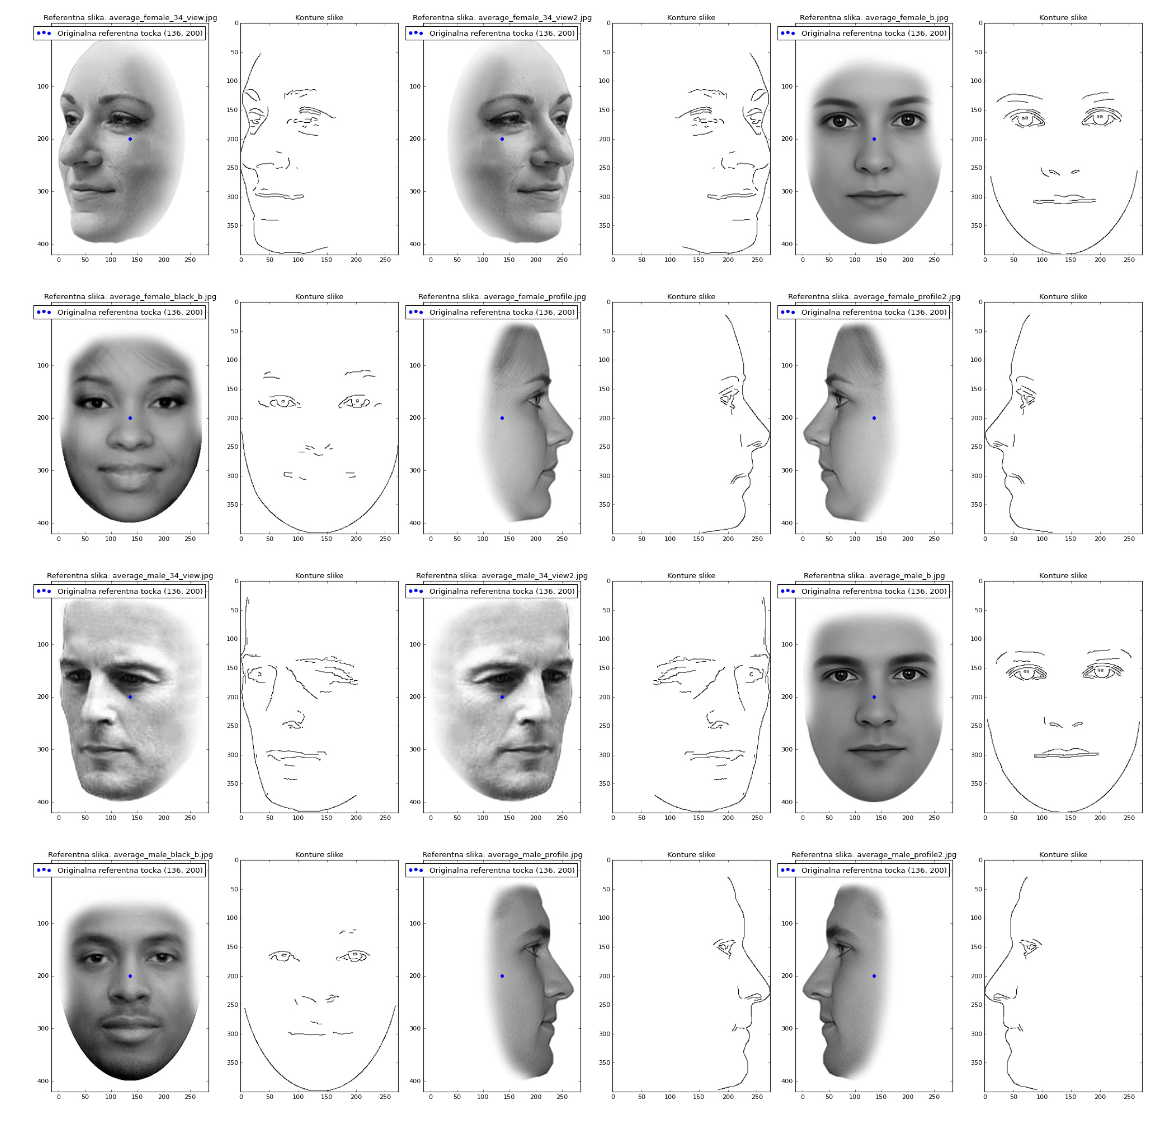

In [6]:
'''
U ovu listu potrebno je staviti imena datoteka slika koje želimo koristiti kao referentne i 
koje se nalaze u direktoriju IMG_DIR_REF. Inicijalno je uređeno da se učitavaju sve slike iz 
direktorija IMG_DIR_REF.
Slike se spremaju u listu slika kao matrice i spremne su za korištenje.
'''
save_img = True
show_img = True

ref_img_paths = [IMG_DIR_REF + file_name for file_name in os.listdir(IMG_DIR_REF) if '.' in file_name]
ref_images = load_ref_imgs(ref_img_paths)

save_dir = IMG_SAVE_DIR + 'REF/'

if show_img:
    ref_plots_paths = plot_ref_imgs_canny(ref_images, ref_img_paths, save_img, save_dir)
    plt.show()
    plt.figure(figsize=(20, 20))
    print 'Kompozit svih referentnih slika i njihovih kontura:'
    plot_ref_imgs_composite(ref_plots_paths, save_img, save_dir)
    plt.show()   

##Stvaranje R-tablice:

In [7]:
'''
Stvara R-tablicu (odnosno R-rječnik) gdje je ključ gradijent neke koordinate, a vrijednost
udaljenost od stvarne referentne točke i kut koji zatvara s apscisom.
'''
start_time = time.time()
r_table = defaultdict(list)
threads = []
for ref_image_i in range(len(ref_img_paths)):
    ref_image_name = ref_img_paths[ref_image_i].split('/')[-1]
    ref_image = ref_images[ref_image_i]
    img_canny, img_sobel = get_canny_sobel(ref_image)
    referencePoint = (ref_image.shape[0]/2, ref_image.shape[1]/2)
    threads.append(FitRTableThread(img_canny, img_sobel, referencePoint, ref_image_name))
    threads[-1].start()
for bt in threads:
    bt.join()

print 'Izgradnja R-tablice: %s s' % (time.time() - start_time)

#print 'Veličina R-tablice:', float(sys.getsizeof(r_table))/1024,'KB'
#print 'Broj gradijenata (ključeva R-tablice):', len(r_table.keys())
#print 'Broj (r, kut) parova (vrijednosti R-tablice):', sum([len(r_table[x]) for x in r_table])

Dretva <FitRTableThread(Thread-6, started 6448)> je fitala referentnu sliku "average_female_34_view.jpg".
Dretva <FitRTableThread(Thread-10, started 6536)> je fitala referentnu sliku "average_female_profile.jpg".
Dretva <FitRTableThread(Thread-16, started 6780)> je fitala referentnu sliku "average_male_profile.jpg".
Dretva <FitRTableThread(Thread-11, started 3196)> je fitala referentnu sliku "average_female_profile2.jpg".
Dretva <FitRTableThread(Thread-17, started 5320)> je fitala referentnu sliku "average_male_profile2.jpg".
Dretva <FitRTableThread(Thread-15, started 7152)> je fitala referentnu sliku "average_male_black_b.jpg".
Dretva <FitRTableThread(Thread-9, started 4712)> je fitala referentnu sliku "average_female_black_b.jpg".
Dretva <FitRTableThread(Thread-7, started 288)> je fitala referentnu sliku "average_female_34_view2.jpg".
Dretva <FitRTableThread(Thread-8, started 6976)> je fitala referentnu sliku "average_female_b.jpg".
Dretva <FitRTableThread(Thread-12, started 7368)> j

In [8]:
print 'Veličina R-tablice:', float(sys.getsizeof(r_table))/1024,'KB'
print 'Broj gradijenata (ključeva R-tablice):', len(r_table.keys())
print 'Broj (r, kut) parova (vrijednosti R-tablice):', sum([len(r_table[x]) for x in r_table])

Veličina R-tablice: 1.015625 KB
Broj gradijenata (ključeva R-tablice): 20
Broj (r, kut) parova (vrijednosti R-tablice): 4839


#Primjer obrade jedne ispitne slike:

##Prikaz ispitne slike:

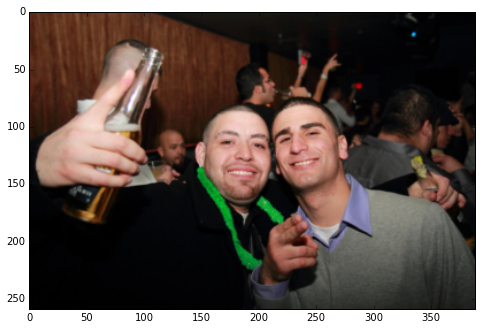

In [10]:
img_test_name = '4237203680.jpg'
img_test = load_img(IMG_DIR + img_test_name, flatten = True)
save_img_name = '.'.join(img_test_name.split('.')[:-1])
save_img_dir = IMG_SAVE_DIR + save_img_name + '/'
if not os.path.exists(save_img_dir):
    os.makedirs(save_img_dir)

step = 0
    
img_name = save_img_name + '.jpg'
img_color = load_img(IMG_DIR + img_name, flatten = False)
plt.figure(figsize=(8, 8))
plt.imshow(img_color)
plt.savefig(save_img_dir + save_img_name  + '_%s_color.jpg' % str(step).zfill(2), dpi=80, bbox_inches='tight')
plt.show()

##Ispitna slika u crno bijeloj i canny (konture) inačici:

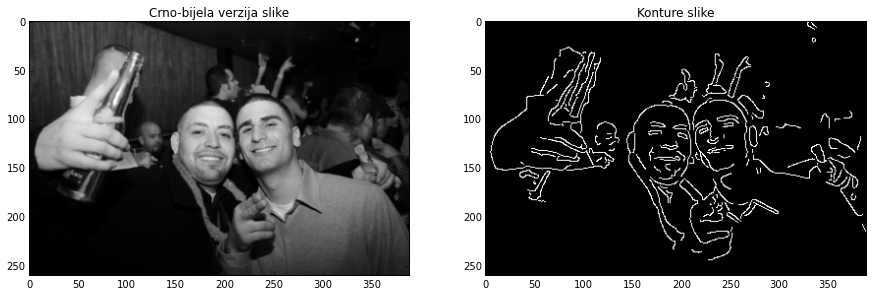

In [11]:
step = 1

save_img = True

plt.figure(figsize=(15, 15))
save_path = save_img_dir + save_img_name  + '_%s_canny.jpg' % str(step).zfill(2)
plot_img_canny_sobel(img_test, plot_origin = False)
if (save_img):
    plt.savefig(save_path, dpi=100, bbox_inches='tight')
plt.show()

##Pregled načina podjele ispitne slike na dijelove:

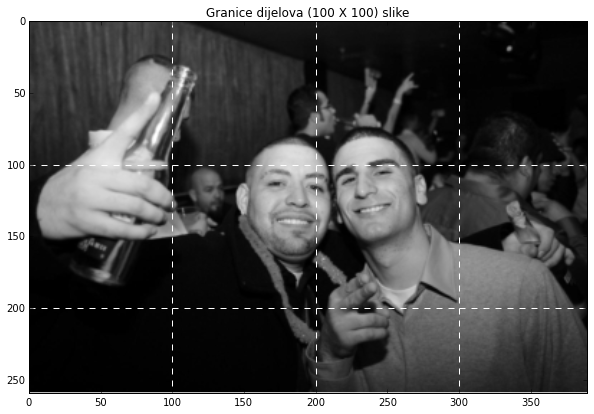

In [12]:
step = 2

save_img = True

plt.figure(figsize=(10, 10))
plot_img_parts_borders(img_test)
if save_img:
    plt.savefig(save_img_dir + save_img_name  + '_%s_parts_borders.jpg' % str(step).zfill(2), dpi=100, bbox_inches='tight')
plt.show()

##Pregled dijelova ispitne slike:

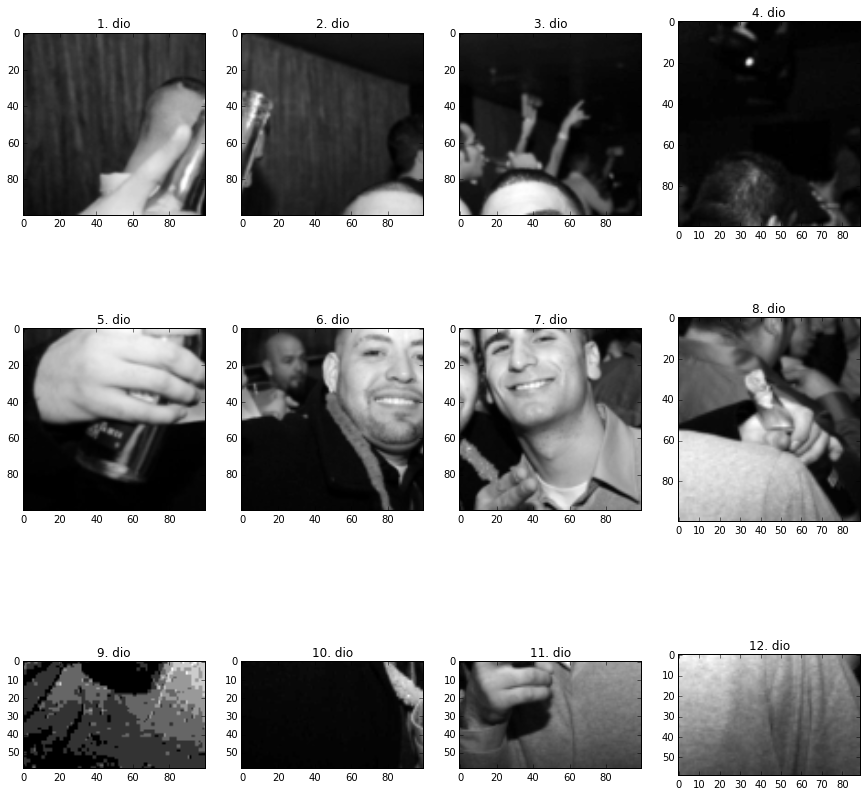

In [13]:
step = 3

save_img = True

plt.figure(figsize=(15, 15))
plot_img_parts(img_test)
if save_img:
    plt.savefig(save_img_dir + save_img_name  + '_%s_parts.jpg' % str(step).zfill(2), dpi=100, bbox_inches='tight')
plt.show()

##Pregled kontura dijelova ispitne slike:

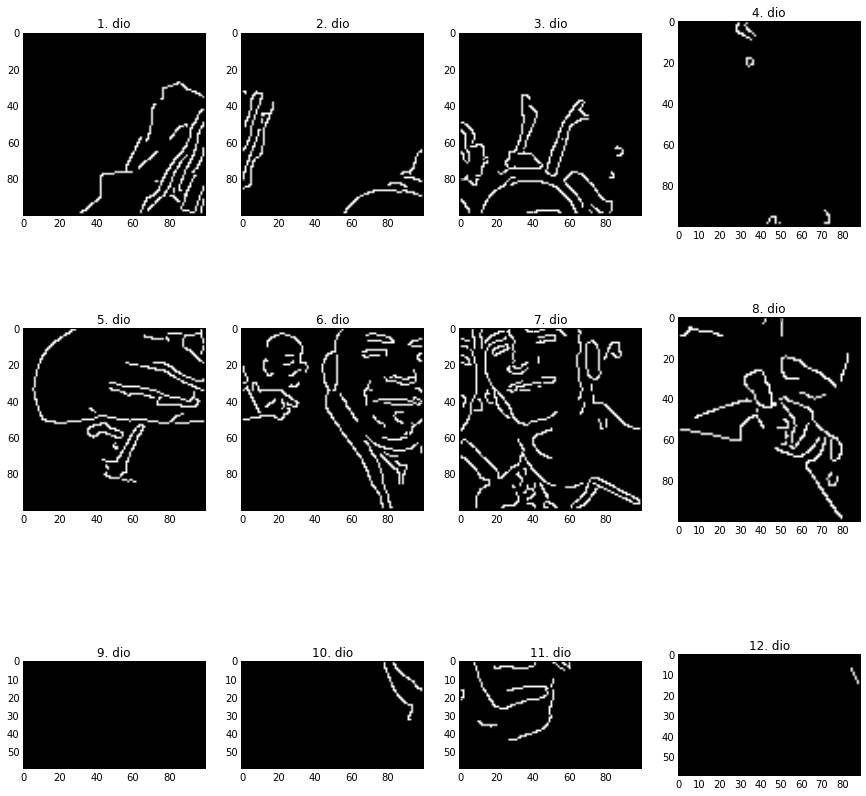

In [14]:
step = 4

save_img = True

plt.figure(figsize=(15, 15))
plot_img_parts_canny(img_test)
if save_img:
    plt.savefig(save_img_dir + save_img_name  + '_%s_parts_canny.jpg' % str(step).zfill(2), dpi=100, bbox_inches='tight')
plt.show()

###Akumulacija nad svakim dijelom ili dohvaćanje već gotovih podataka ako je već prije izvršena i prikaz nađenih toačaka i njihovih vrijednosti po dijelu ispitne slike:

Potrebna je akumulacija dijelova slike!
Trenutni dio: 1/12
Vrijeme akumulacije dijela slike: 11.4789998531 s
Trenutni dio: 2/12
Vrijeme akumulacije dijela slike: 7.13700008392 s
Trenutni dio: 3/12
Vrijeme akumulacije dijela slike: 16.4330000877 s
Trenutni dio: 4/12
Vrijeme akumulacije dijela slike: 1.59899997711 s
Trenutni dio: 5/12
Vrijeme akumulacije dijela slike: 20.0299999714 s
Trenutni dio: 6/12
Vrijeme akumulacije dijela slike: 30.1009998322 s
Trenutni dio: 7/12
Vrijeme akumulacije dijela slike: 30.4970002174 s
Trenutni dio: 8/12
Vrijeme akumulacije dijela slike: 20.4779999256 s
Trenutni dio: 9/12
Vrijeme akumulacije dijela slike: 0.00499987602234 s
Trenutni dio: 10/12
Vrijeme akumulacije dijela slike: 1.71700000763 s
Trenutni dio: 11/12
Vrijeme akumulacije dijela slike: 6.10400009155 s
Trenutni dio: 12/12
Vrijeme akumulacije dijela slike: 0.213000059128 s
Vrijeme akumulacije dijelova slike: 145.792999983 s


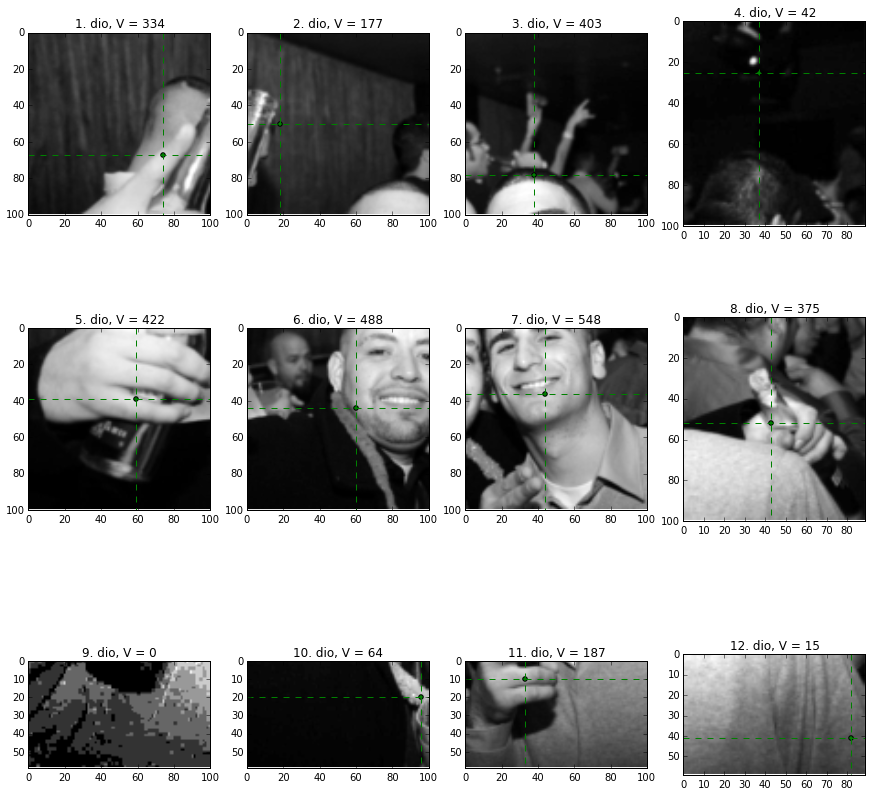

In [15]:
step = 5

save_img = True

start_time = time.time()
img_parts, parts_first_points = get_img_parts(img_test)

pkl_parts_first_points = save_img_name + '_parts_first_points.pkl' #početne točke dijelova slike

if pkl_parts_first_points not in os.listdir(save_img_dir):
    f = open( save_img_dir + pkl_parts_first_points, "wb" )
    pkl.dump(parts_first_points, f)
    f.close()
    

pkl_best_points_of_parts = save_img_name + '_best_points_of_parts.pkl' #ako već postoje akumulirane točke 
                                                                       #ne treba se čekati akumulacija
if pkl_best_points_of_parts in os.listdir(save_img_dir):
    best_points_of_parts = pkl.load( open( save_img_dir + pkl_best_points_of_parts, "rb" ))
else:
    print 'Potrebna je akumulacija dijelova slike!'
    start_time = time.time()
    best_points_of_parts = get_best_points_of_parts(img_parts)
    print 'Vrijeme akumulacije dijelova slike: %s s' % (time.time() - start_time)
    f = open( save_img_dir + pkl_best_points_of_parts, "wb" )
    pkl.dump(best_points_of_parts, f)
    f.close()

plt.figure(figsize=(15, 15))
plot_best_points_of_parts(img_parts, best_points_of_parts)
if save_img:
    plt.savefig(save_img_dir + save_img_name  + '_%s_parts_best_points.jpg' % str(step).zfill(2), dpi=100, bbox_inches='tight')
plt.show()

##Prikaz nađenih točaka dijelova na ukupnoj ispitnoj slici:

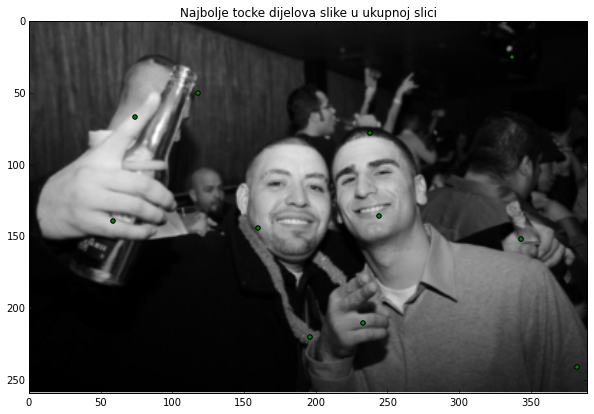

In [16]:
step = 6

save_img = True

pkl_adjusted_part_points = save_img_name + '_adjusted_part_points.pkl' #ako već postoje popravljene točke
if pkl_adjusted_part_points in os.listdir(save_img_dir):
    adjusted_part_points = pkl.load( open( save_img_dir + pkl_adjusted_part_points, "rb" ))
else:
    adjusted_part_points = get_adjusted_part_points(best_points_of_parts, parts_first_points)
    f = open( save_img_dir + pkl_adjusted_part_points, "wb" )
    pkl.dump(adjusted_part_points, f)
    f.close()

plt.figure(figsize=(10, 10))
plot_best_points(img_test, adjusted_part_points)
if save_img:
    plt.savefig(save_img_dir + save_img_name  + '_%s_best_points.jpg' % str(step).zfill(2), dpi=100, bbox_inches='tight')
plt.show()

###Prikaz ručno napravljenog mata lica pomoću kojeg će se odrediti koje točke se nalaze unutar lica:

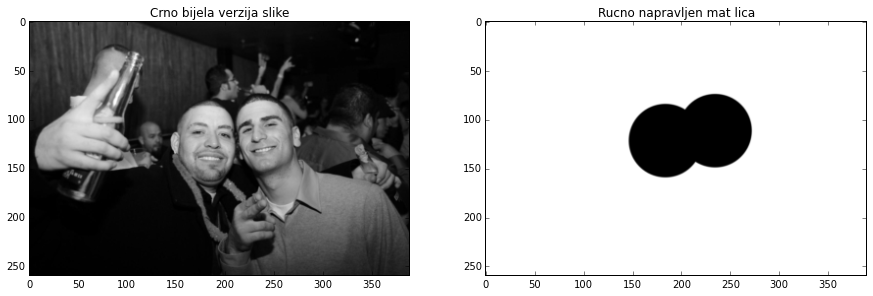

In [17]:
step = 7

save_img = True

img_matte_name = save_img_name + '_matte.jpg'
img_matte = load_img(IMG_DIR + img_matte_name)
plt.figure(figsize=(15, 15))
plot_img_face_matte(img_test, img_matte)
if save_img:
    plt.savefig(save_img_dir + save_img_name  + '_%s_face_position.jpg' % str(step).zfill(2), dpi=100, bbox_inches='tight')
plt.show()

###Prikaz grafa (ne)uspjeha ovisnih o korištenom pragu T i točaka koje su (ne)uspješno detektirale i lokalizirale lice ovisno o različitm izračunatim pragovima T:

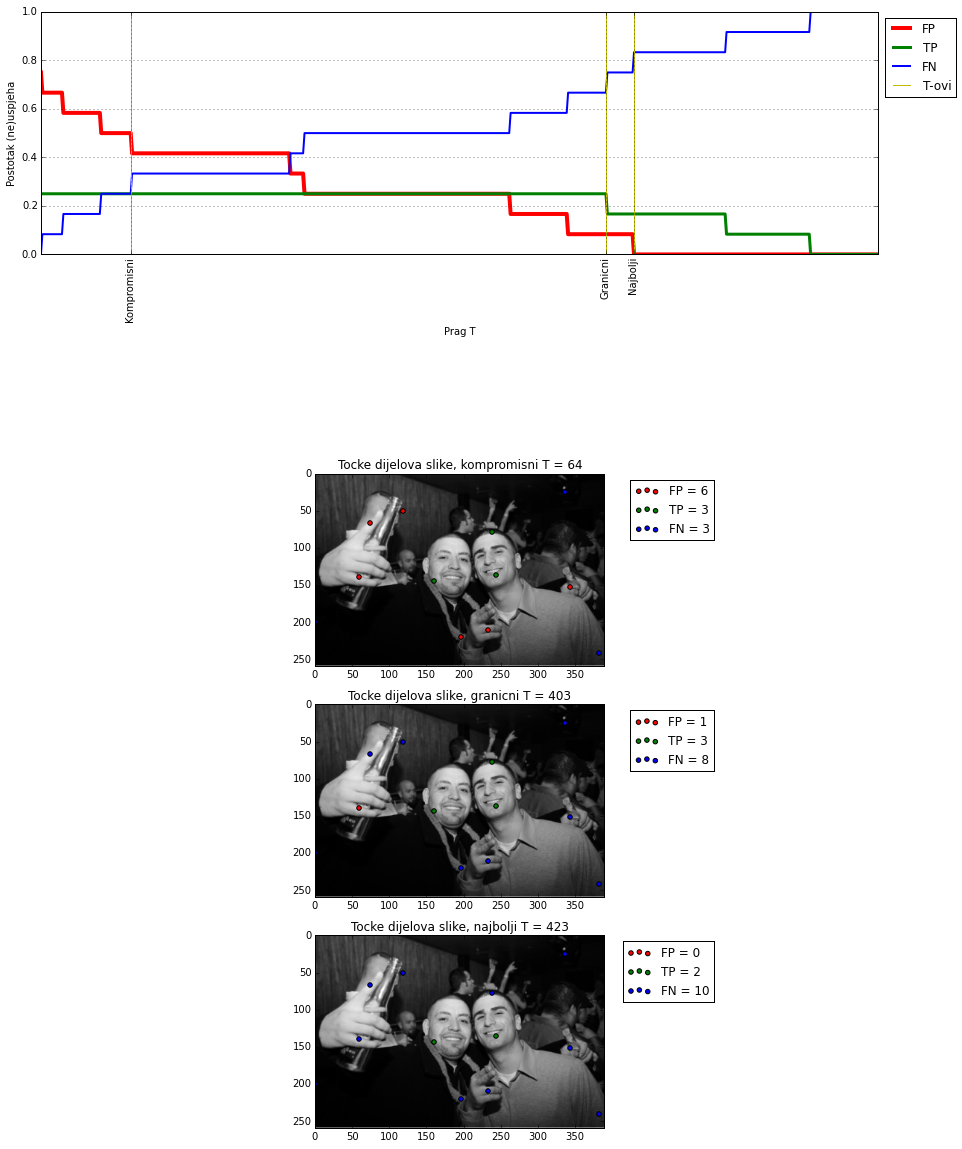

In [18]:
step = 8

T_stop, T_compromise, T_border, T_best = get_thresholds(adjusted_part_points, img_matte)

fps, tps, fns = get_success_lists(adjusted_part_points, img_matte, 0)
success_dict = {}
success_dict['fps'] = fps
success_dict['tps'] = tps

pkl_success_dict = save_img_name + '_success_dict.pkl' #ako već postoje popravljene točke
f = open( save_img_dir + pkl_success_dict, "wb" )
pkl.dump(success_dict, f)
f.close()


plt.figure(figsize=(15, 20))
plot_success_values(img_test, img_matte, adjusted_part_points, T_stop, T_compromise, T_border, T_best)
plt.savefig(save_img_dir + save_img_name  + '_%s_success_values.jpg' % str(step).zfill(2), dpi=100, bbox_inches='tight')
plt.show()

##Obrada ispitnih slika:

In [41]:
img_names_list = ['_'.join(x.split('_')[:-1]) + '.' + x.split('.')[-1] for x in os.listdir(IMG_DIR) if x.split('_')[-1] == 'matte.jpg']

print 'Korištene ispitne slike:'
for img_name in img_names_list:
    print img_name

current = 1
for img_name in img_names_list:
    print '---------------------------'
    print '%d/%d:' % (current, len(img_names_list)), img_name
    print '---------------------------'
    process_img_test(img_name, save_img = True, show_img = False)
    print '\n'
    current += 1
    

Korištene ispitne slike:
120563545.jpg
1648807314.jpg
174692320.jpg
2080551997.jpg
2122067003.jpg
2201628776.jpg
2288136183.jpg
2542662563.jpg
261068.jpg
2653111362.jpg
281972218.jpg
346731834.jpg
368987306.jpg
3929640120.jpg
399829006.jpg
40014967.jpg
4009440741.jpg
4237203680.jpg
4253907822.jpg
437595409.jpg
442651885.jpg
447910249.jpg
4739664721.jpg
642820626.jpg
70037463.jpg
878985234.jpg
9545523490.jpg
955659370.jpg
biber.jpg
face_1_test9.jpg
forrest_gump.jpg
---------------------------
1/31: 120563545.jpg
---------------------------


---------------------------
2/31: 1648807314.jpg
---------------------------


---------------------------
3/31: 174692320.jpg
---------------------------


---------------------------
4/31: 2080551997.jpg
---------------------------


---------------------------
5/31: 2122067003.jpg
---------------------------


---------------------------
6/31: 2201628776.jpg
---------------------------


---------------------------
7/31: 2288136183.jpg
----------

##Evaluacija rezultata obrade ispitnih slika:

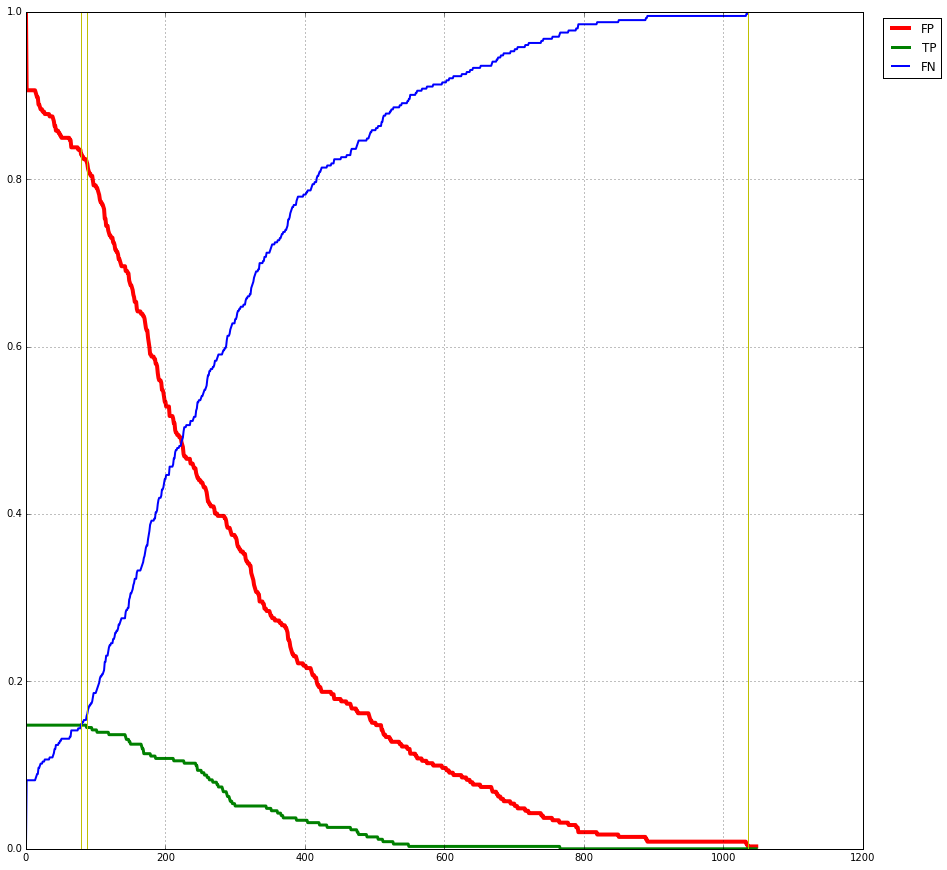

Maksimalna postignuta vrijednost: 1048
Kompromisni T: 79
Granični T: 87
Najbolji T: 1035


In [166]:
success_dict_all = {}
for img_name in img_names_list:
    name = '.'.join(img_name.split('.')[:-1])
    try:
        load_img_dir = IMG_SAVE_DIR + name + '/'
        pkl_success_dict = name + '_success_dict.pkl'
        success_dict = pkl.load( open( load_img_dir + pkl_success_dict, "rb" ))
        for key in success_dict:
            if key not in success_dict_all:
                success_dict_all[key] = success_dict[key]
            else:
                success_dict_all[key] += success_dict[key]  
    except:
        print 'Nedostaju podaci o ispitnoj slici %s!' % img_name

if save_img and (not os.path.exists(IMG_SAVE_DIR + 'EVAL/')):
        os.makedirs(IMG_SAVE_DIR + 'EVAL/')
pkl_success_dict_all =  'EVAL_success_dict_all.pkl' #ako već postoje popravljene točke
f = open( IMG_SAVE_DIR + 'EVAL/' + pkl_success_dict_all, "wb" )
pkl.dump(pkl_success_dict_all, f)
f.close()

plt.figure(figsize=(15, 15))
plot_success_values_n(success_dict_all)
T_stop, T_compromise, T_border, T_best  = get_Ts_success(success_dict_all)
show_Ts = T_compromise, T_border, T_best
T_labels = ['Kompromisni', 'Granicni', 'Najbolji']
for T in show_Ts:
    plt.plot([T,T], [0,1], color = 'y')
plt.plot([T,T], [0,1], color = 'y', label = 'T-ovi')
plt.savefig(IMG_SAVE_DIR + 'EVAL/'  + 'eval_all_success_values.jpg', dpi=100, bbox_inches='tight')
plt.show()

print 'Maksimalna postignuta vrijednost:',T_stop
print 'Kompromisni T:',T_compromise
print 'Granični T:',T_border
print 'Najbolji T:',T_best 



###Korištenje dobivenih pragova na temelju svih slika:

In [162]:
eval_txt_file = open(IMG_SAVE_DIR + 'EVAL/eval_all_success.txt','w+')
eval_txt_file.write(' ;Kompromisni T;Granični T;Najbolji T\n')
eval_txt_file.write('Ime slike;FP;TP;FN;FP;TP;FN;FP;TP;FN\n')
for img_name in img_names_list:
    name = '.'.join(img_name.split('.')[:-1])
    line = img_name + ';'
    try:
        load_img_dir = IMG_SAVE_DIR + name + '/'
        pkl_success_dict = name + '_success_dict.pkl'
        success_dict = pkl.load( open( load_img_dir + pkl_success_dict, "rb" ))
        print img_name, '\t', 
        for T in (T_compromise, T_border, T_best):
            ctt = get_success_ns(success_dict, T)
            line += ';'.join([str(x) for x in ctt]) + ';'
            print ctt,'\t',
        print ''
        eval_txt_file.write(line + '\n')
    except:
        print 'Nedostaju podaci o ispitnoj slici %s!' % img_name 
eval_txt_file.close()

120563545.jpg 	(10, 2, 0) 	(10, 2, 0) 	(0, 0, 12) 	
1648807314.jpg 	(11, 1, 0) 	(11, 1, 0) 	(0, 0, 12) 	
174692320.jpg 	(8, 3, 5) 	(8, 3, 5) 	(0, 0, 16) 	
2080551997.jpg 	(10, 2, 0) 	(9, 2, 1) 	(0, 0, 12) 	
2122067003.jpg 	(12, 0, 0) 	(12, 0, 0) 	(0, 0, 12) 	
2201628776.jpg 	(11, 1, 0) 	(10, 1, 1) 	(0, 0, 12) 	
2288136183.jpg 	(12, 0, 0) 	(12, 0, 0) 	(0, 0, 12) 	
2542662563.jpg 	(6, 2, 4) 	(6, 2, 4) 	(0, 0, 12) 	
261068.jpg 	(11, 1, 0) 	(11, 1, 0) 	(0, 0, 12) 	
2653111362.jpg 	(11, 1, 0) 	(11, 1, 0) 	(0, 0, 12) 	
281972218.jpg 	(14, 1, 1) 	(14, 1, 1) 	(0, 0, 16) 	
346731834.jpg 	(5, 2, 5) 	(5, 2, 5) 	(0, 0, 12) 	
368987306.jpg 	(15, 0, 1) 	(15, 0, 1) 	(0, 0, 16) 	
3929640120.jpg 	(7, 2, 3) 	(7, 2, 3) 	(0, 0, 12) 	
399829006.jpg 	(11, 1, 0) 	(10, 1, 1) 	(0, 0, 12) 	
40014967.jpg 	(10, 2, 4) 	(10, 1, 5) 	(0, 0, 16) 	
4009440741.jpg 	(10, 2, 0) 	(10, 2, 0) 	(0, 0, 12) 	
4237203680.jpg 	(5, 3, 4) 	(5, 3, 4) 	(0, 0, 12) 	
4253907822.jpg 	(8, 2, 6) 	(8, 2, 6) 	(0, 0, 16) 	
437595409.jpg 	(12

###Korištenje srednjih pragova nastalih korištenjem pragova pojedinih ispitnih slika:

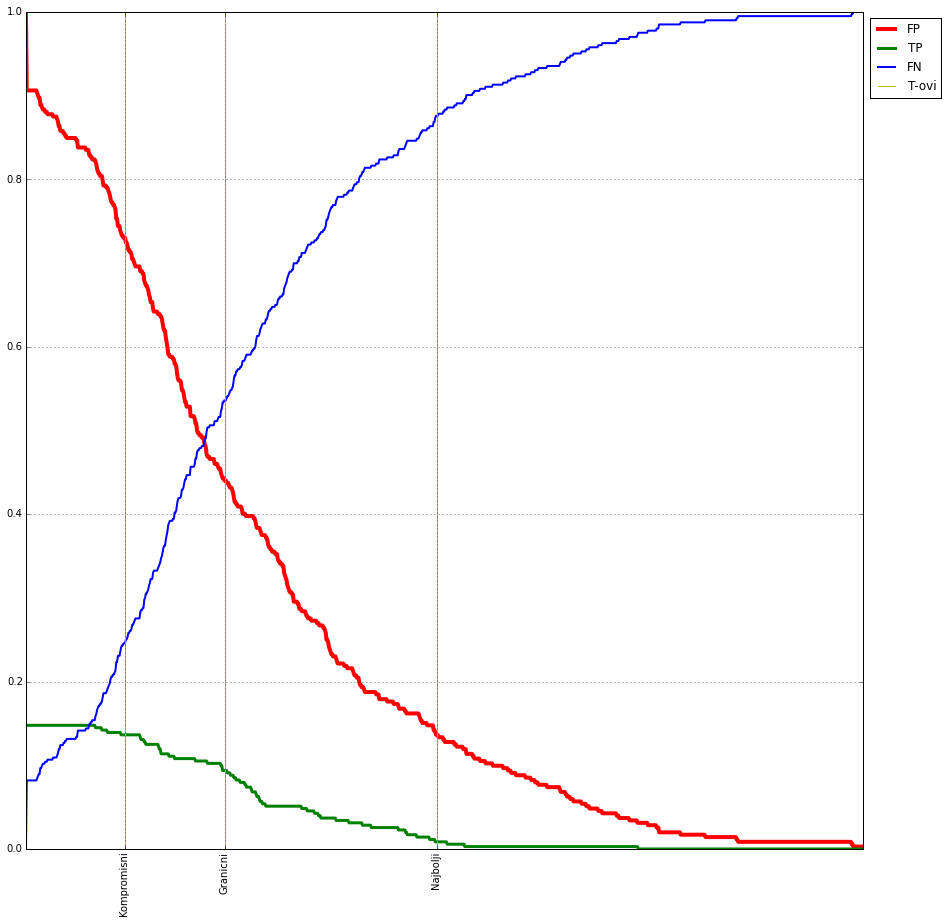

Maksimalna postignuta vrijednost: 1048
Srednji kompromisni T: 124
Srednji granični T: 249
Srednji najbolji T: 514


In [175]:
T_max = 0
T_compromise_sum = 0
T_border_sum = 0
T_best_sum = 0

current = 1
for img_name in img_names_list:
    name = '.'.join(img_name.split('.')[:-1])
    try:
        load_img_dir = IMG_SAVE_DIR + name + '/'
        pkl_success_dict = name + '_success_dict.pkl'
        success_dict = pkl.load( open( load_img_dir + pkl_success_dict, "rb" ))
        T_stop, T_compromise, T_border, T_best  = get_Ts_success(success_dict)
        
        if T_stop > T_max:
            T_max = T_stop
        T_compromise_sum += T_compromise
        T_border_sum += T_border
        T_best_sum += T_best
        current += 1
    except:
        print 'Nedostaju podaci o ispitnoj slici %s!' % img_name 
T_compromise_avg = int(round(T_compromise_sum / float(current)))
T_border_avg = int(round(T_border_sum / float(current)))
T_best_avg = int(round(T_best_sum / float(current)))

plt.figure(figsize=(15, 15))
plot_success_values_n(success_dict_all)
show_Ts = T_compromise_avg, T_border_avg, T_best_avg
T_labels = ['Kompromisni', 'Granicni', 'Najbolji']
plt.xticks([T_compromise_avg, T_border_avg, T_best_avg], T_labels, rotation='vertical')
for T in show_Ts:
    plt.plot([T,T], [0,1], color = 'y')
plt.plot([T,T], [0,1], color = 'y', label = 'T-ovi')
plt.legend(bbox_to_anchor=(1.10, 1.00))
plt.savefig(IMG_SAVE_DIR + 'EVAL/'  + 'eval_all_success_values_avg_Ts.jpg', dpi=100, bbox_inches='tight')
plt.show()

print 'Maksimalna postignuta vrijednost:',T_max
print 'Srednji kompromisni T:',T_compromise_avg
print 'Srednji granični T:',T_border_avg
print 'Srednji najbolji T:',T_best_avg

In [176]:
eval_txt_file = open(IMG_SAVE_DIR + 'EVAL/eval_avg_success.txt','w+')
eval_txt_file.write(' ;Kompromisni T;Granični T;Najbolji T\n')
eval_txt_file.write('Ime slike;FP;TP;FN;FP;TP;FN;FP;TP;FN\n')
for img_name in img_names_list:
    name = '.'.join(img_name.split('.')[:-1])
    line = img_name + ';'
    try:
        load_img_dir = IMG_SAVE_DIR + name + '/'
        pkl_success_dict = name + '_success_dict.pkl'
        success_dict = pkl.load( open( load_img_dir + pkl_success_dict, "rb" ))
        print img_name, '\t', 
        for T in (T_compromise_avg, T_border_avg, T_best_avg):
            ctt = get_success_ns(success_dict, T)
            line += ';'.join([str(x) for x in ctt]) + ';'
            print ctt,'\t',
        print ''
        eval_txt_file.write(line + '\n')
    except:
        print 'Nedostaju podaci o ispitnoj slici %s!' % img_name 
eval_txt_file.close()
        
        

120563545.jpg 	(8, 2, 2) 	(3, 2, 7) 	(0, 0, 12) 	
1648807314.jpg 	(10, 1, 1) 	(7, 1, 4) 	(1, 0, 11) 	
174692320.jpg 	(8, 3, 5) 	(6, 1, 9) 	(0, 0, 16) 	
2080551997.jpg 	(9, 2, 1) 	(2, 1, 9) 	(0, 0, 12) 	
2122067003.jpg 	(10, 0, 2) 	(1, 0, 11) 	(0, 0, 12) 	
2201628776.jpg 	(10, 1, 1) 	(7, 1, 4) 	(1, 0, 11) 	
2288136183.jpg 	(12, 0, 0) 	(11, 0, 1) 	(4, 0, 8) 	
2542662563.jpg 	(5, 2, 5) 	(1, 2, 9) 	(0, 0, 12) 	
261068.jpg 	(11, 1, 0) 	(9, 1, 2) 	(2, 0, 10) 	
2653111362.jpg 	(11, 1, 0) 	(11, 1, 0) 	(9, 1, 2) 	
281972218.jpg 	(11, 1, 4) 	(6, 1, 9) 	(1, 0, 15) 	
346731834.jpg 	(5, 2, 5) 	(4, 1, 7) 	(0, 0, 12) 	
368987306.jpg 	(12, 0, 4) 	(4, 0, 12) 	(0, 0, 16) 	
3929640120.jpg 	(7, 2, 3) 	(6, 2, 4) 	(0, 1, 11) 	
399829006.jpg 	(10, 1, 1) 	(4, 1, 7) 	(0, 0, 12) 	
40014967.jpg 	(10, 1, 5) 	(7, 1, 8) 	(2, 0, 14) 	
4009440741.jpg 	(9, 2, 1) 	(6, 2, 4) 	(1, 0, 11) 	
4237203680.jpg 	(5, 3, 4) 	(3, 3, 6) 	(0, 1, 11) 	
4253907822.jpg 	(8, 2, 6) 	(4, 0, 12) 	(0, 0, 16) 	
437595409.jpg 	(12, 0, 0) 	(12